# Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

# Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

# Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**
- **Booking_ID:** the unique identifier of each booking
- **no_of_adults:** Number of adults
- **no_of_children:** Number of Children
- **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **no_of_week_nights:** Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **type_of_meal_plan:** Type of meal plan booked by the customer:
 - Not Selected – No meal plan selected
 - Meal Plan 1 – Breakfast
 - Meal Plan 2 – Half board (breakfast and one other meal)
 - Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
- **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- **lead_time:** Number of days between the date of booking and the arrival date
- **arrival_year:** Year of arrival date
- **arrival_month:** Month of arrival date
- **arrival_date:** Date of the month
- **market_segment_type:** Market segment designation.
- **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
- **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
- **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status:** Flag indicating if the booking was canceled or not.




# Importing Libraries

In [ ]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# To tune different models
from sklearn.model_selection import GridSearchCV



In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [ ]:
data = pd.read_csv("/content/INNHotelsGroup.csv")

## Understand the dataset

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.shape

(36275, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 5 object varaiables, 1 float variable and 13 integer variables.

Object Variables are:
- Booking_ID
- type_of_meal_plan
- room_type_reserved
- market_segment_type
- booking_status

In [ ]:
data['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [ ]:
data['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [ ]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [ ]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

## Check for Null values

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Check for NaN

In [ ]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Statistical Summary

In [ ]:
data.describe(include=["object"]).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

In [ ]:
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

# Exploratory Data Analysis

## Univariate Analysis

### `no_of_adults` - Outlier Detected

<Axes: xlabel='no_of_adults', ylabel='count'>

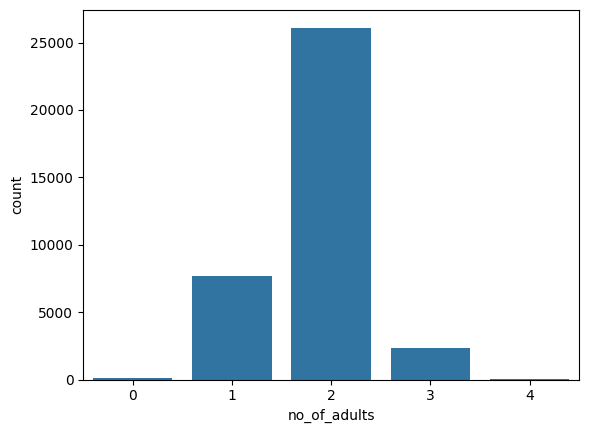

In [ ]:
sns.countplot(data = data, x = "no_of_adults")

In [ ]:
data['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [ ]:
data[data['no_of_adults']==0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
32      INN00033             0               2                     0   
287     INN00288             0               2                     2   
653     INN00654             0               2                     1   
937     INN00938             0               2                     0   
954     INN00955             0               2                     1   
...          ...           ...             ...                   ...   
34720   INN34721             0               2                     0   
34730   INN34731             0               2                     1   
34890   INN34891             0               2                     2   
35691   INN35692             0               2                     2   
35797   INN35798             0               2                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
32                     3       Meal Plan 1                           0   
287                    2       Meal Plan 1                           0   
653                    2       Meal Plan 1                           0   
937                    3       Meal Plan 1                           0   
954                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
34720                  3       Meal Plan 1                           0   
34730                  1       Meal Plan 1                           0   
34890                  2       Meal Plan 1                           0   
35691                  1       Meal Plan 1                           0   
35797                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
32           Room_Type 2         56          2018             12   
287          Room_Type 1         68          2018              4   
653          Room_Type 2         78          2018              8   
937          Room_Type 2         40          2018              1   
954          Room_Type 2         92          2018             10   
...                  ...        ...           ...            ...   
34720        Room_Type 2         76          2018              9   
34730        Room_Type 2        178          2018              8   
34890        Room_Type 2         31          2018              9   
35691        Room_Type 2         75          2018              3   
35797        Room_Type 2        120          2018              6   

       arrival_date market_segment_type  repeated_guest  \
32                7              Online               0   
287              24              Online               0   
653              19              Online               0   
937              14              Online               0   
954              29              Online               0   
...             ...                 ...             ...   
34720            21              Online               0   
34730            27              Online               0   
34890            16              Online               0   
35691            19              Online               0   
35797            30              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
287                               0                                     0   
653                               0                                     0   
937                               0                                     0   
954                               0                                     0   
...                             ...                                   ...   
34720                             0                                     0   
34730                             0                                     0   
34890                            

In [ ]:
data[data['no_of_adults']==0].shape

(139, 19)

In [ ]:
data[data['no_of_adults']==4].shape

(16, 19)

<Axes: xlabel='no_of_adults'>

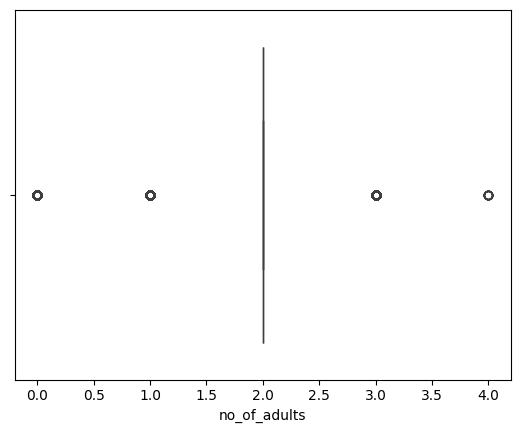

In [ ]:
sns.boxplot(data = data, x = "no_of_adults")

### `no_of_children` - Outlier Detected

<Axes: xlabel='no_of_children', ylabel='count'>

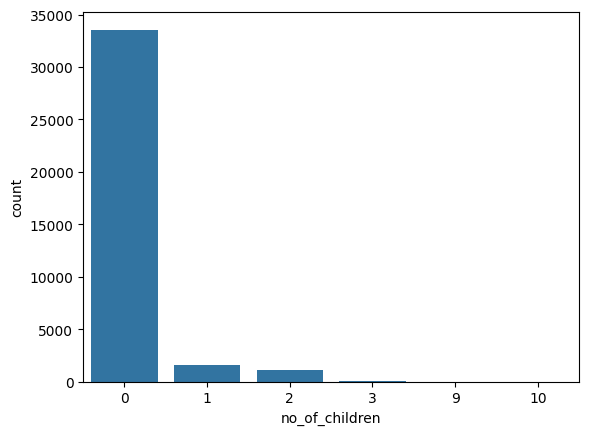

In [ ]:
sns.countplot(data = data, x = "no_of_children")

In [ ]:
data[data['no_of_children']>3]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
6338    INN06339             2              10                     0   
10041   INN10042             1               9                     2   
10061   INN10062             2               9                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
6338                   2       Meal Plan 1                           0   
10041                  1       Meal Plan 1                           0   
10061                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
6338         Room_Type 4         37          2018              1   
10041        Room_Type 1         11          2017             10   
10061        Room_Type 2          8          2017              8   

       arrival_date market_segment_type  repeated_guest  \
6338             12              Online               0   
10041            11           Corporate               0   
10061            13              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6338                              0                                     0   
10041                             0                                     0   
10061                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
6338                84.45                       1   Not_Canceled  
10041               95.00                       0   Not_Canceled  
10061               76.50                       1       Canceled

In [ ]:
data[data['no_of_children']==3].shape

(19, 19)

<Axes: xlabel='no_of_children'>

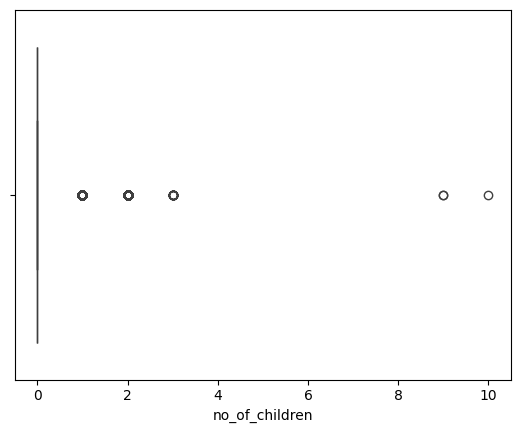

In [ ]:
sns.boxplot(data = data, x = "no_of_children")

### `no_of_weekend_nights`

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

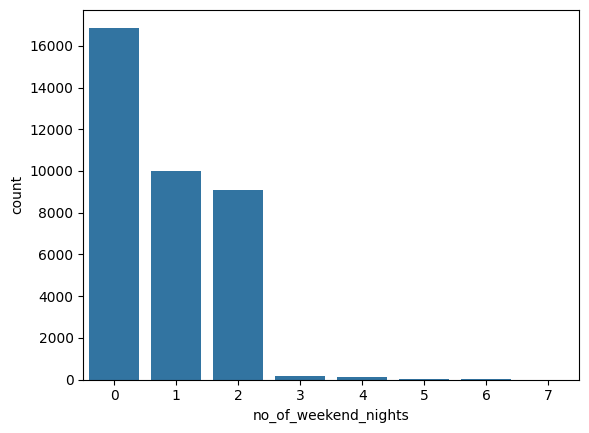

In [ ]:
sns.countplot(data = data, x = "no_of_weekend_nights")

In [ ]:
data[data['no_of_weekend_nights']>3]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
194     INN00195             2               0                     4   
380     INN00381             2               0                     4   
539     INN00540             1               0                     6   
554     INN00555             1               2                     4   
732     INN00733             2               2                     4   
...          ...           ...             ...                   ...   
35449   INN35450             2               0                     4   
35778   INN35779             3               0                     4   
35784   INN35785             2               0                     4   
35904   INN35905             2               2                     4   
36163   INN36164             1               0                     6   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
194                   10       Meal Plan 1                           0   
380                   11       Meal Plan 1                           0   
539                   15       Meal Plan 1                           0   
554                    9       Meal Plan 1                           0   
732                   10       Meal Plan 1                           0   
...                  ...               ...                         ...   
35449                 10       Meal Plan 1                           0   
35778                 10       Meal Plan 1                           0   
35784                  8       Meal Plan 1                           0   
35904                 10       Meal Plan 1                           0   
36163                 13       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
194          Room_Type 4        147          2018              8   
380          Room_Type 4        237          2018              9   
539          Room_Type 4         12          2018              3   
554          Room_Type 6         30          2018             11   
732          Room_Type 6        222          2018              8   
...                  ...        ...           ...            ...   
35449        Room_Type 1        212          2018              7   
35778        Room_Type 4         73          2018              7   
35784        Room_Type 4          5          2018              2   
35904        Room_Type 6         43          2018              3   
36163        Room_Type 4        102          2018              5   

       arrival_date market_segment_type  repeated_guest  \
194               3              Online               0   
380              13              Online               0   
539              30              Online               0   
554               2              Online               0   
732              14              Online               0   
...             ...                 ...             ...   
35449            27              Online               0   
35778             2              Online               0   
35784            12              Online               0   
35904            25              Online               0   
36163            15              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
194                               0                                     0   
380                               0                                     0   
539                               0                                     0   
554                               0                                     0   
732                               0                                     0   
...                             ...                                   ...   
35449                             0                                     0   
35778                             0                                     0   
35784                            

In [ ]:
temp = data[data['no_of_weekend_nights']>3]

In [ ]:
temp[temp['no_of_week_nights']>8]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
194     INN00195             2               0                     4   
380     INN00381             2               0                     4   
539     INN00540             1               0                     6   
554     INN00555             1               2                     4   
732     INN00733             2               2                     4   
...          ...           ...             ...                   ...   
35407   INN35408             3               0                     5   
35449   INN35450             2               0                     4   
35778   INN35779             3               0                     4   
35904   INN35905             2               2                     4   
36163   INN36164             1               0                     6   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
194                   10       Meal Plan 1                           0   
380                   11       Meal Plan 1                           0   
539                   15       Meal Plan 1                           0   
554                    9       Meal Plan 1                           0   
732                   10       Meal Plan 1                           0   
...                  ...               ...                         ...   
35407                 10       Meal Plan 1                           0   
35449                 10       Meal Plan 1                           0   
35778                 10       Meal Plan 1                           0   
35904                 10       Meal Plan 1                           0   
36163                 13       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
194          Room_Type 4        147          2018              8   
380          Room_Type 4        237          2018              9   
539          Room_Type 4         12          2018              3   
554          Room_Type 6         30          2018             11   
732          Room_Type 6        222          2018              8   
...                  ...        ...           ...            ...   
35407        Room_Type 4        204          2018              8   
35449        Room_Type 1        212          2018              7   
35778        Room_Type 4         73          2018              7   
35904        Room_Type 6         43          2018              3   
36163        Room_Type 4        102          2018              5   

       arrival_date market_segment_type  repeated_guest  \
194               3              Online               0   
380              13              Online               0   
539              30              Online               0   
554               2              Online               0   
732              14              Online               0   
...             ...                 ...             ...   
35407            15              Online               0   
35449            27              Online               0   
35778             2              Online               0   
35904            25              Online               0   
36163            15              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
194                               0                                     0   
380                               0                                     0   
539                               0                                     0   
554                               0                                     0   
732                               0                                     0   
...                             ...                                   ...   
35407                             0                                     0   
35449                             0                                     0   
35778                            

<Axes: xlabel='no_of_weekend_nights'>

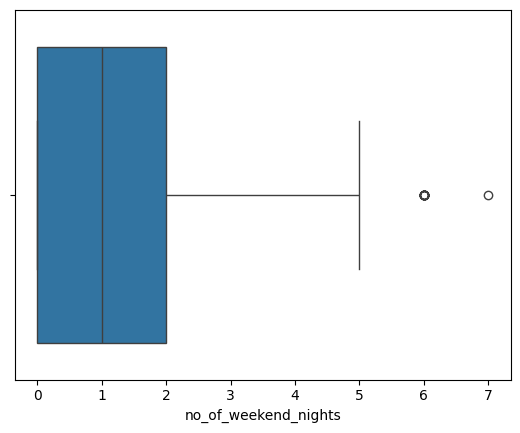

In [ ]:
sns.boxplot(data = data, x = "no_of_weekend_nights")

### `no_of_week_nights`

<Axes: xlabel='no_of_week_nights'>

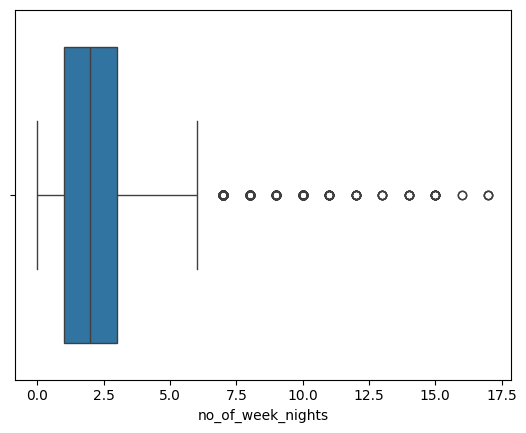

In [ ]:
sns.boxplot(data = data, x = "no_of_week_nights")

<Axes: xlabel='no_of_week_nights', ylabel='count'>

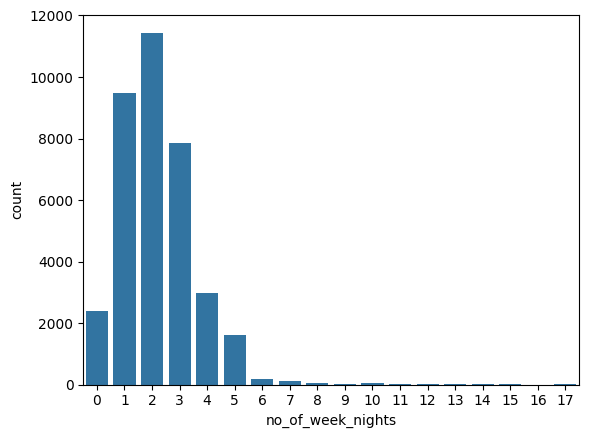

In [ ]:
sns.countplot(data = data, x = "no_of_week_nights")

### `type_of_meal_plan`

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

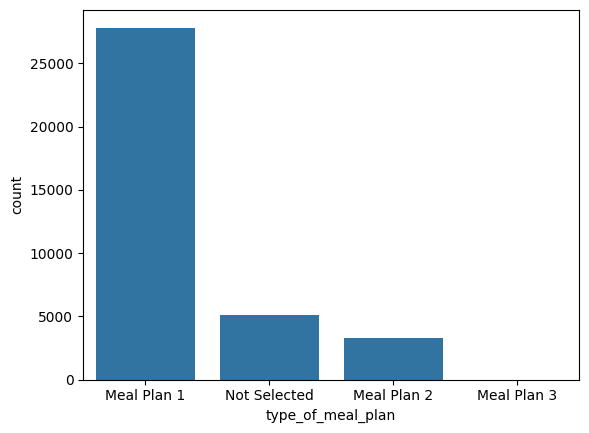

In [ ]:
sns.countplot(data = data, x = "type_of_meal_plan")

### `required_car_parking_space`

<Axes: xlabel='required_car_parking_space', ylabel='count'>

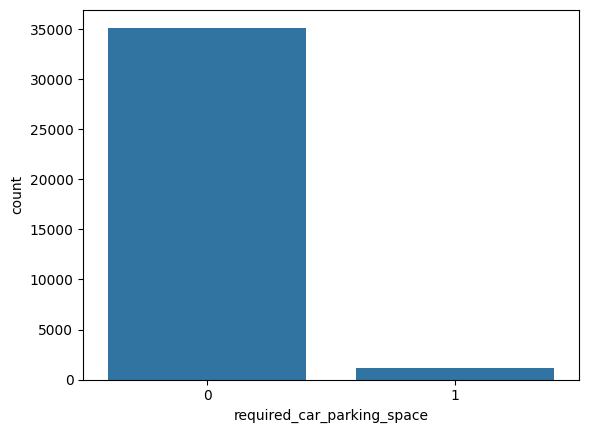

In [ ]:
sns.countplot(data = data, x = "required_car_parking_space")

### `room_type_reserved`

<Axes: xlabel='room_type_reserved', ylabel='count'>

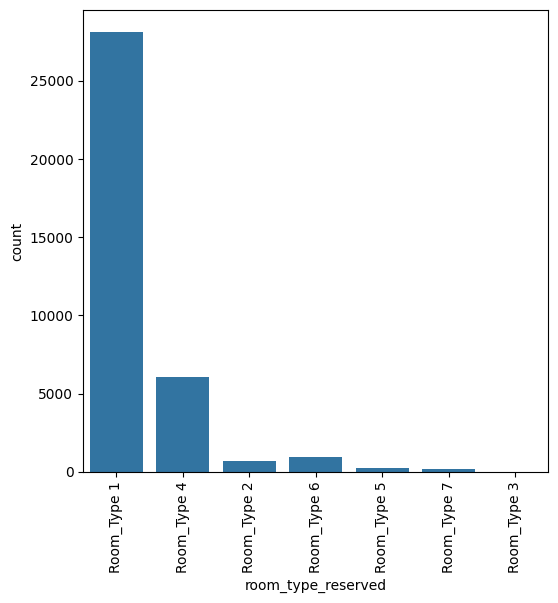

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.countplot(data = data, x = "room_type_reserved")

### `lead_time` - Outliers Detected

<Axes: xlabel='lead_time', ylabel='Count'>

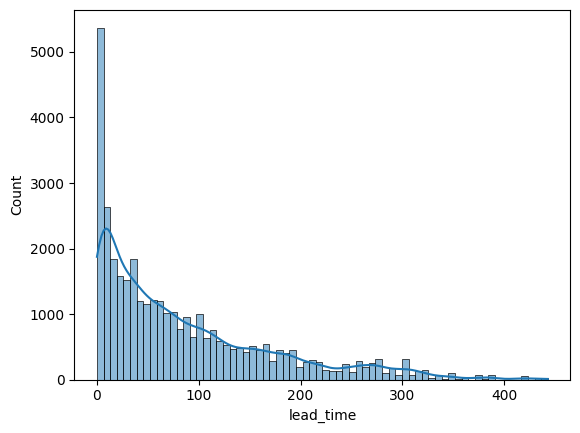

In [ ]:
sns.histplot(data = data, x = "lead_time", kde = True)

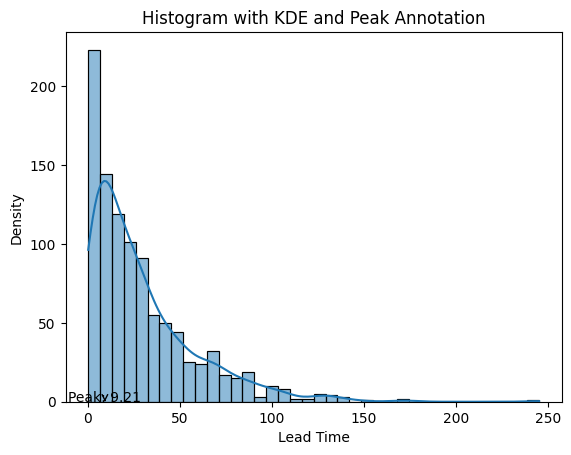

In [ ]:
from scipy.stats import gaussian_kde

# Example data
np.random.seed(42)
data = {"lead_time": np.random.exponential(scale=30, size=1000)}

# Create the histogram with KDE
sns.histplot(data=data, x="lead_time", kde=True)

# Extract the KDE line
x_values = np.linspace(data["lead_time"].min(), data["lead_time"].max(), 1000)
kde = gaussian_kde(data["lead_time"])
kde_values = kde(x_values)

# Find the peak of the KDE
peak_x = x_values[np.argmax(kde_values)]
peak_y = kde_values.max()

# Annotate the peak
plt.annotate(f'Peak: {peak_x:.2f}', xy=(peak_x, peak_y), xytext=(peak_x, peak_y + 0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

# Display the plot
plt.xlabel("Lead Time")
plt.ylabel("Density")
plt.title("Histogram with KDE and Peak Annotation")
plt.show()


<Axes: xlabel='lead_time'>

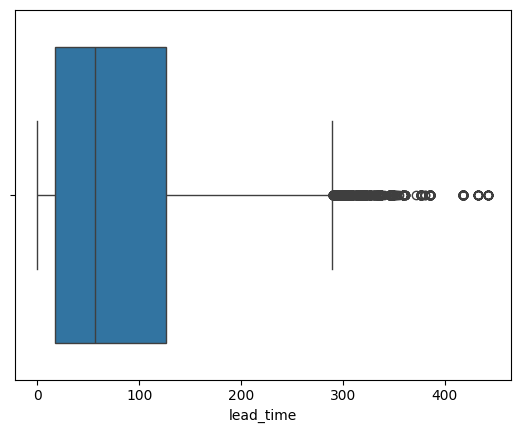

In [ ]:
sns.boxplot(data = data, x = "lead_time")

In [ ]:
data[data['lead_time']>290].shape

(1290, 19)

In [ ]:
data['lead_time'].mean()

85.23255685733976

In [ ]:
data['lead_time'].median()

57.0

### `arrival_month`

<Axes: xlabel='arrival_month', ylabel='count'>

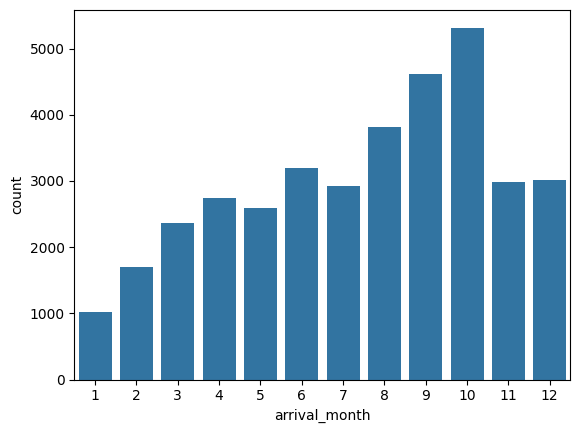

In [ ]:
sns.countplot(data = data, x = "arrival_month")

### `arrival_year`

<Axes: xlabel='arrival_year', ylabel='count'>

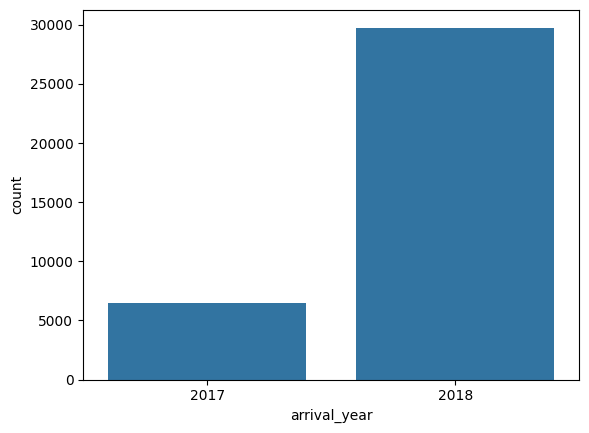

In [ ]:
sns.countplot(data = data, x = "arrival_year")

### `arrival_date`

<Axes: xlabel='arrival_date', ylabel='count'>

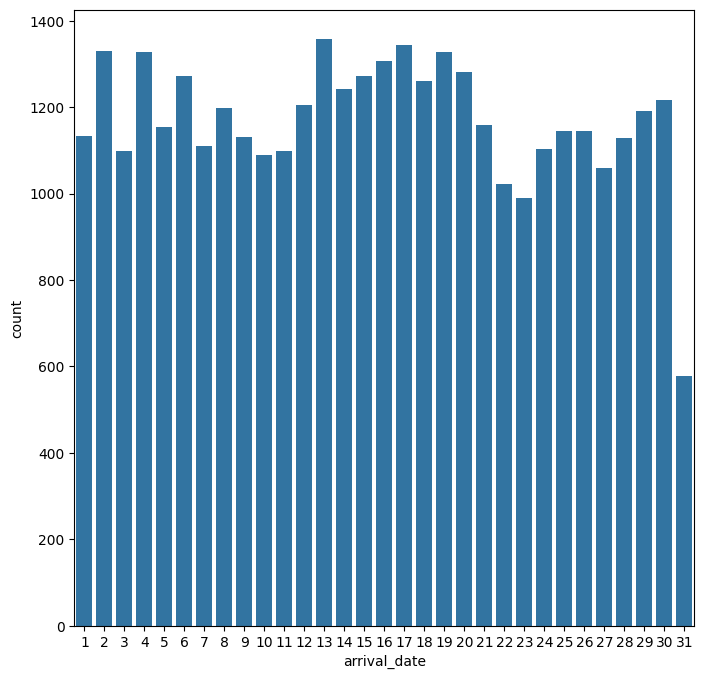

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data = data, x = "arrival_date")

<Axes: xlabel='arrival_date', ylabel='Count'>

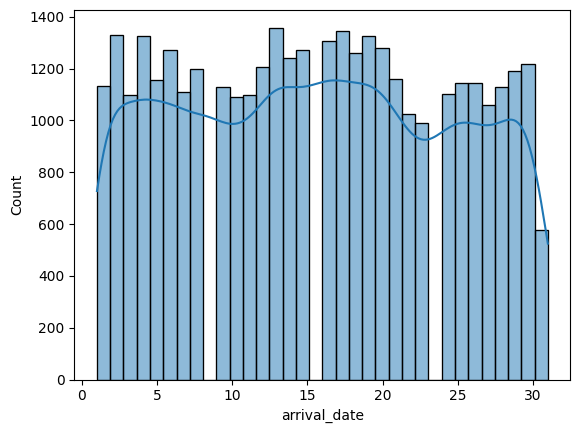

In [ ]:
sns.histplot(data = data, x = "arrival_date", kde = True)

### `market_segment_type`

<Axes: xlabel='market_segment_type', ylabel='count'>

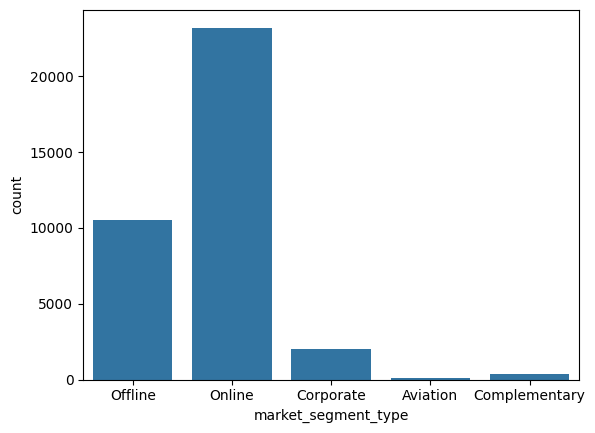

In [ ]:
sns.countplot(data = data, x = "market_segment_type")

### `repeated_guest`

<Axes: xlabel='repeated_guest', ylabel='count'>

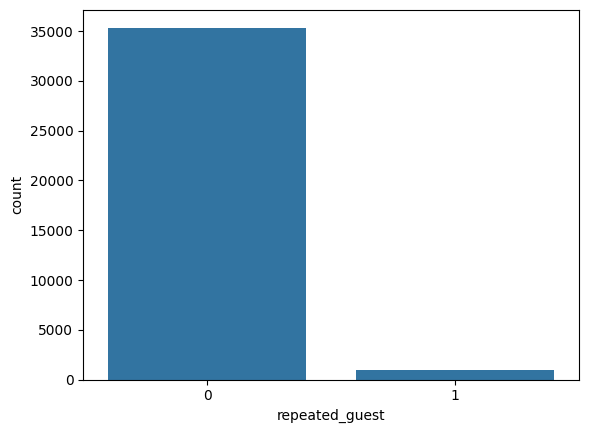

In [ ]:
sns.countplot(data = data, x = "repeated_guest")

### `no_of_previous_cancellations`

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

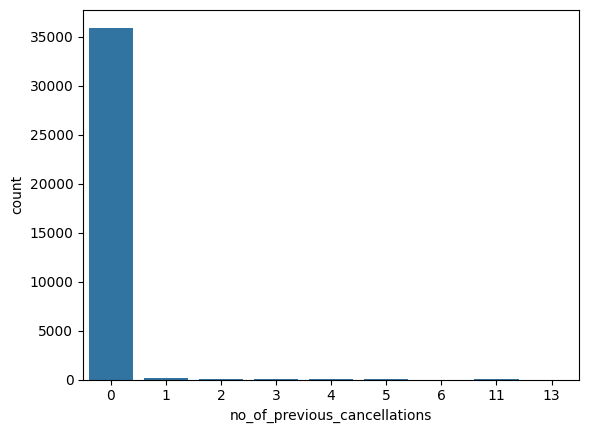

In [ ]:
sns.countplot(data = data, x = "no_of_previous_cancellations")

<Axes: xlabel='no_of_previous_cancellations', ylabel='Count'>

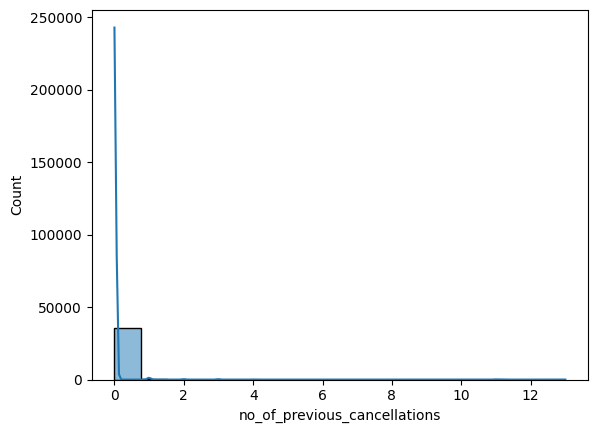

In [ ]:
sns.histplot(data = data, x = "no_of_previous_cancellations", kde = True)

### `no_of_previous_bookings_not_canceled`

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

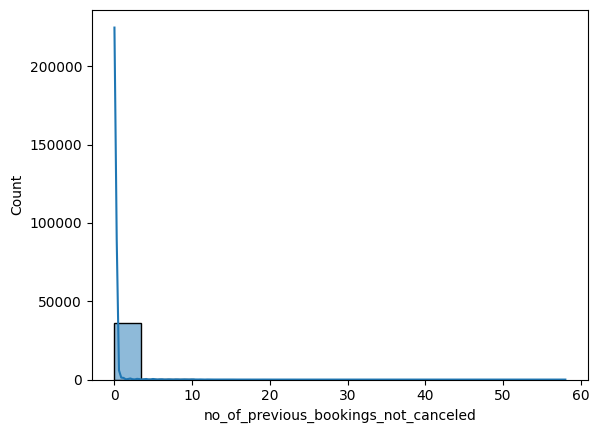

In [ ]:
sns.histplot(data = data, x = "no_of_previous_bookings_not_canceled", kde = True)

### `avg_price_per_room`

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

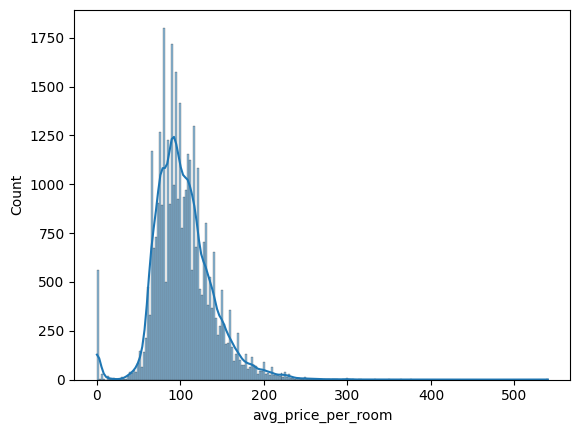

In [ ]:
sns.histplot(data = data, x = "avg_price_per_room", kde = True)

### `no_of_special_requests`

<Axes: xlabel='no_of_special_requests', ylabel='count'>

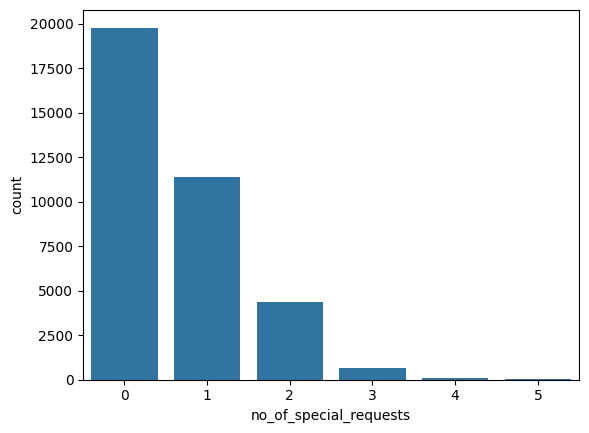

In [ ]:
sns.countplot(data = data, x = 'no_of_special_requests')

### `booking_status`

<Axes: xlabel='booking_status', ylabel='count'>

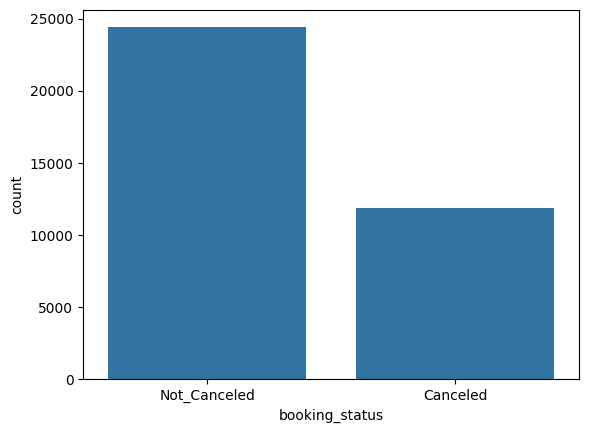

In [ ]:
sns.countplot(data = data, x = 'booking_status')

## Bivariate Analysis

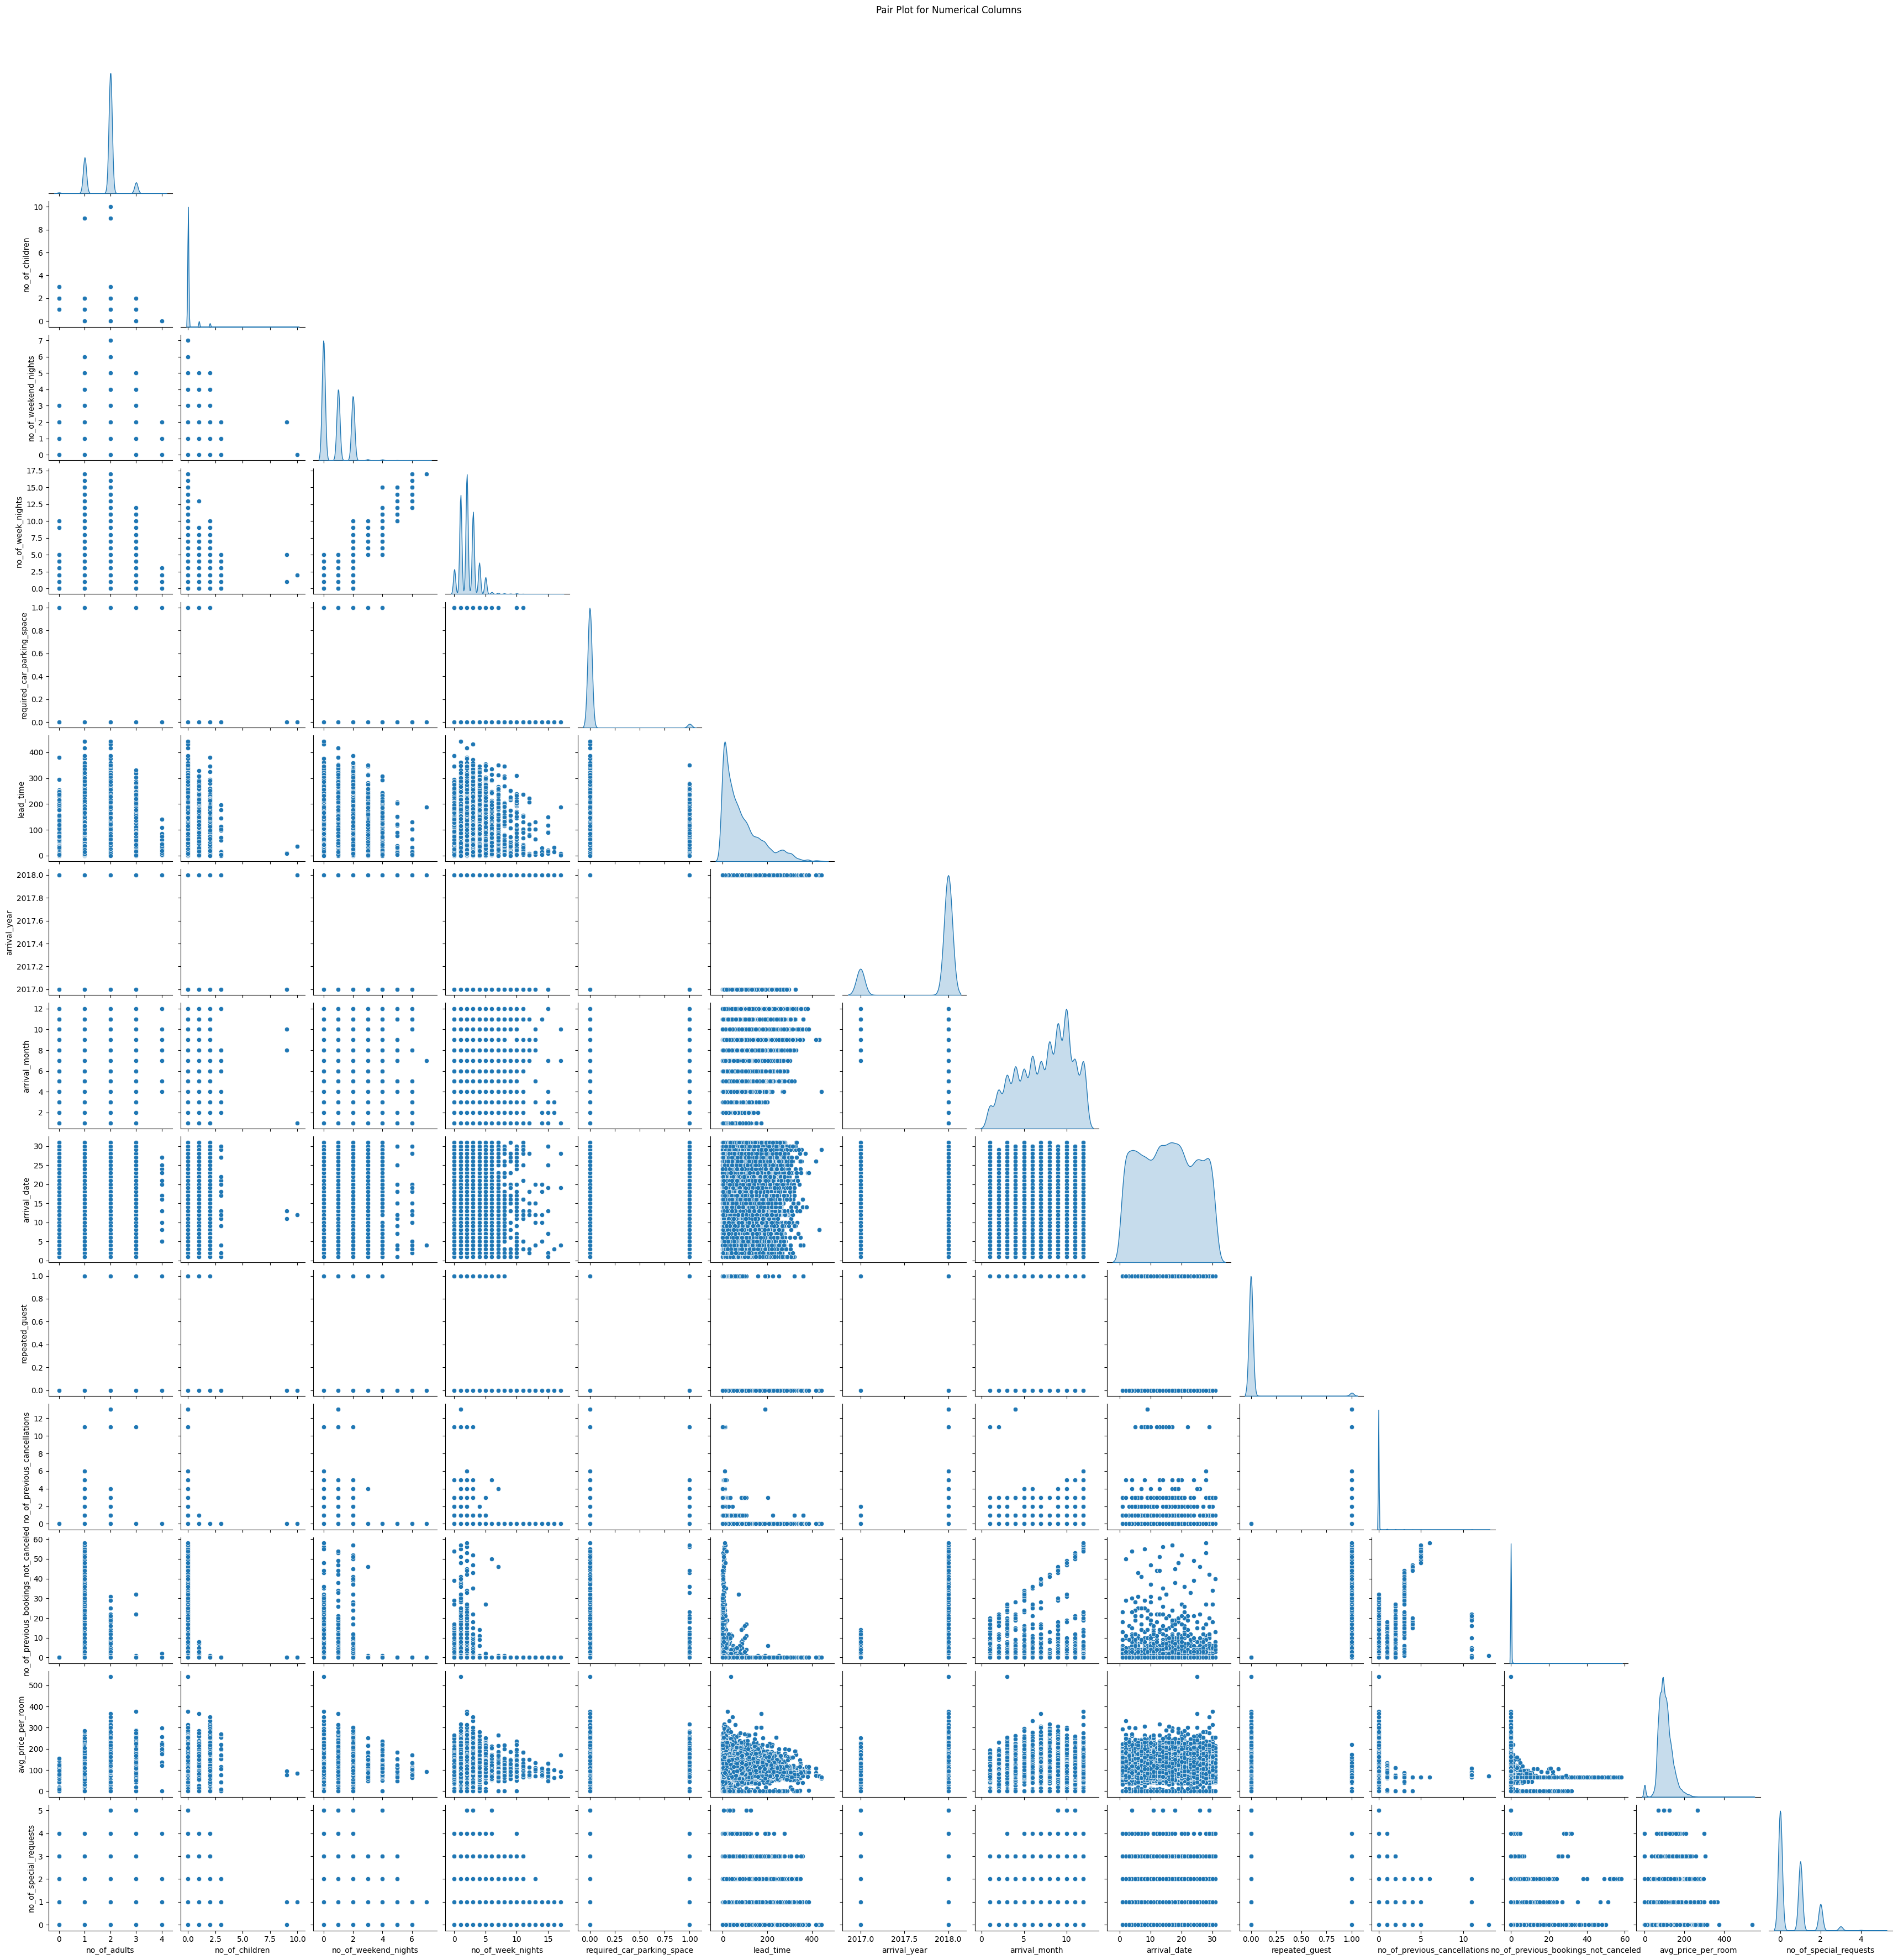

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Pair plot
sns.pairplot(data[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()


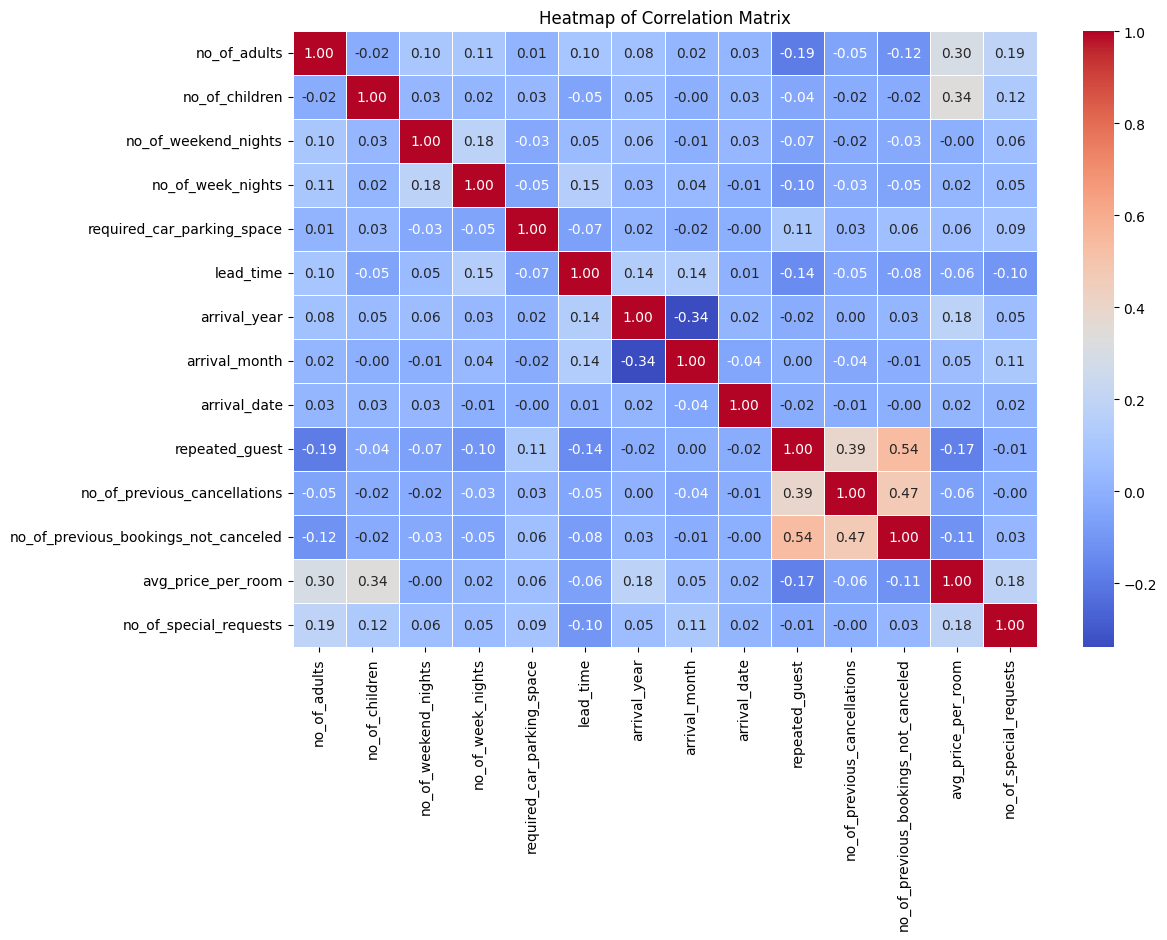

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
data.head(1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0                65.0   

   no_of_special_requests booking_status  
0                       0   Not_Canceled

<Axes: xlabel='market_segment_type', ylabel='count'>

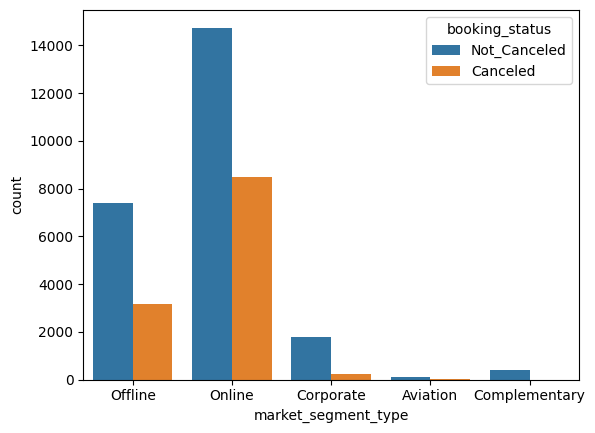

In [ ]:
sns.countplot(data = data , x = "market_segment_type", hue = "booking_status")

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

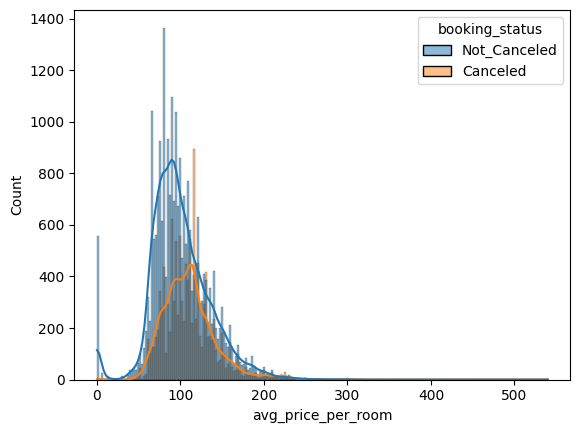

In [ ]:
sns.histplot(data = data , x = "avg_price_per_room", hue = "booking_status", kde = True)

<Axes: xlabel='avg_price_per_room'>

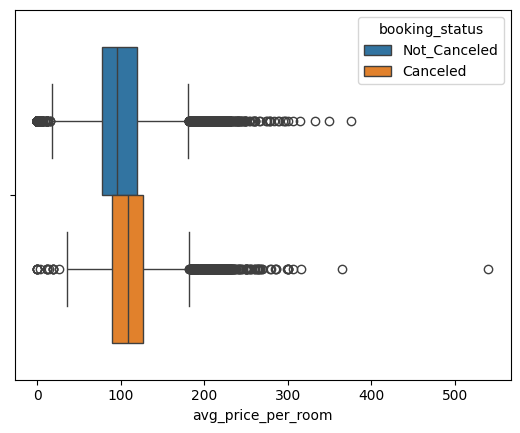

In [ ]:
sns.boxplot(data = data , x = "avg_price_per_room", hue = "booking_status")

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

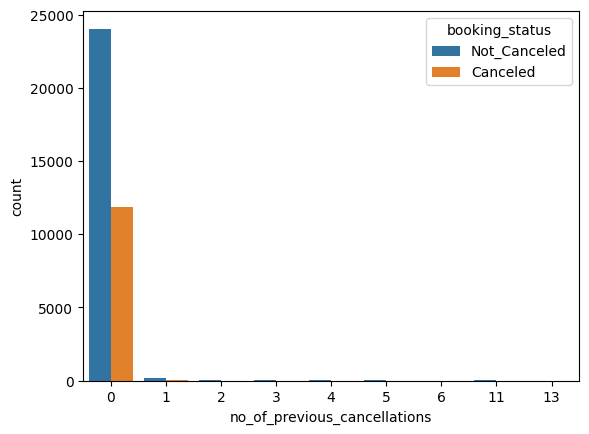

In [ ]:
sns.countplot(data = data , x = "no_of_previous_cancellations", hue = "booking_status")

<Axes: xlabel='no_of_previous_cancellations', ylabel='Count'>

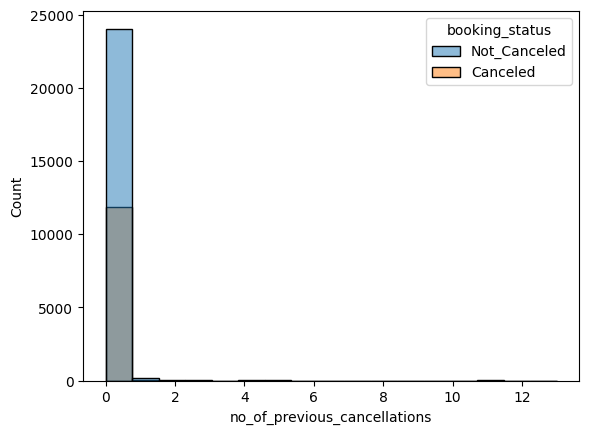

In [ ]:
sns.histplot(data = data , x = "no_of_previous_cancellations", hue = "booking_status")

<Axes: xlabel='no_of_previous_cancellations', ylabel='booking_status'>

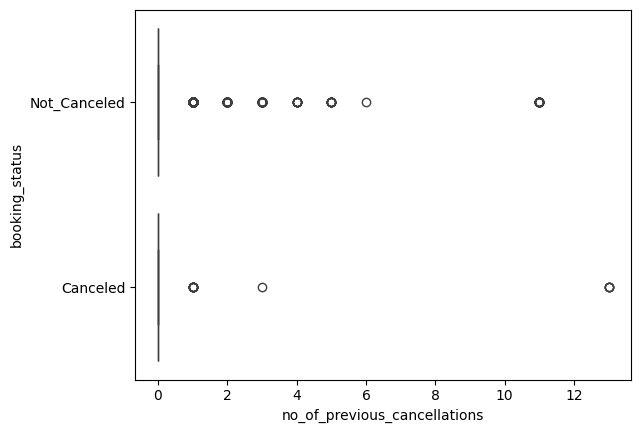

In [ ]:
sns.boxplot(data = data , x = "no_of_previous_cancellations", y = "booking_status")

<Axes: xlabel='repeated_guest', ylabel='count'>

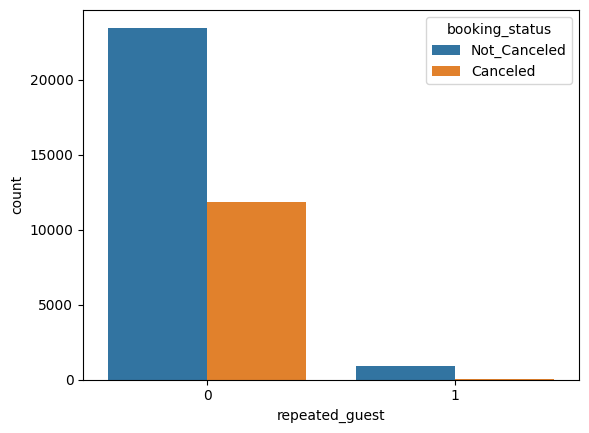

In [ ]:
sns.countplot(data = data , x = "repeated_guest", hue = "booking_status")

<Axes: xlabel='room_type_reserved', ylabel='count'>

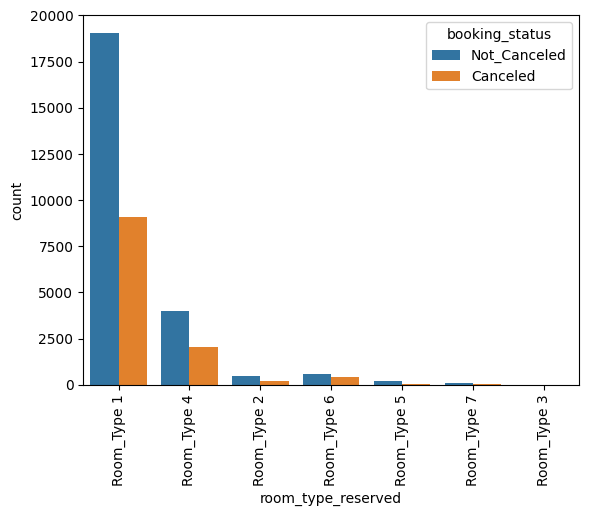

In [ ]:
plt.xticks(rotation = 90)
sns.countplot(data = data , x = "room_type_reserved", hue = "booking_status")

<Axes: xlabel='required_car_parking_space', ylabel='count'>

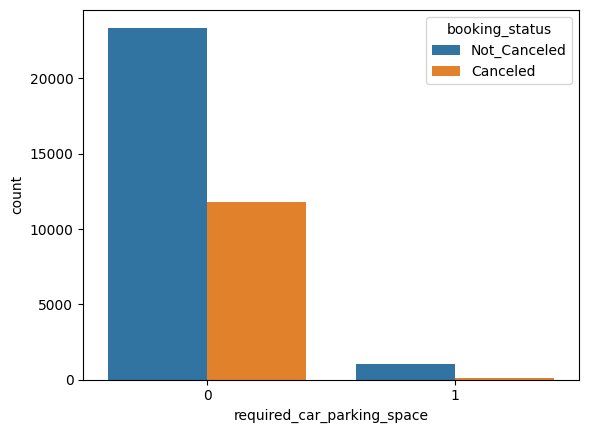

In [ ]:
sns.countplot(data = data , x = "required_car_parking_space", hue = "booking_status")

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

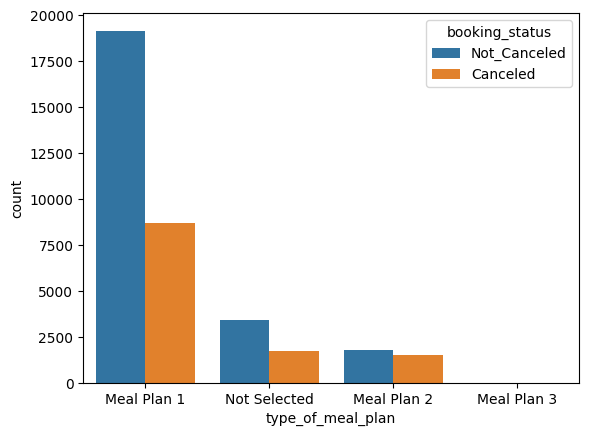

In [ ]:
sns.countplot(data = data , x = "type_of_meal_plan", hue = "booking_status")

<Axes: xlabel='no_of_adults', ylabel='count'>

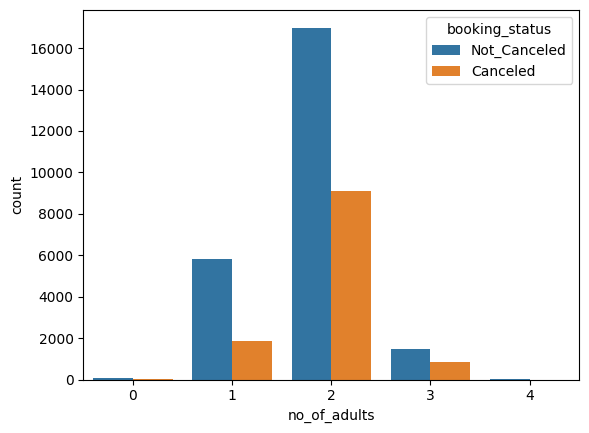

In [ ]:
sns.countplot(data = data , x = "no_of_adults", hue = "booking_status")

<Axes: xlabel='no_of_children', ylabel='count'>

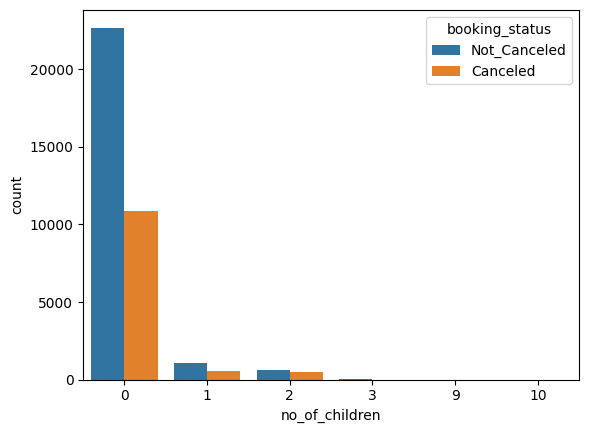

In [ ]:
sns.countplot(data = data , x = "no_of_children", hue = "booking_status")

## EDA Questions

### 1. What are the busiest months in the hotel?

<Axes: xlabel='arrival_month', ylabel='count'>

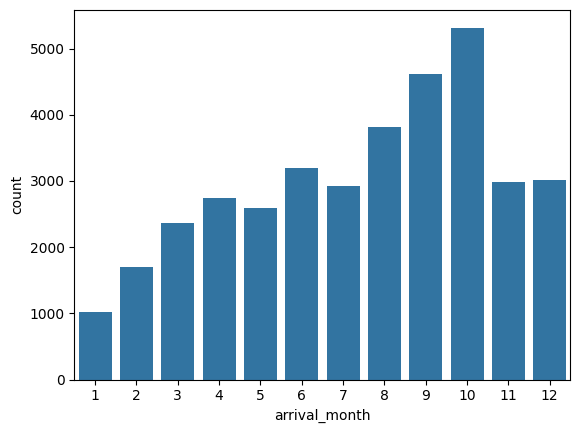

In [ ]:
sns.countplot(data = data, x = "arrival_month")

- Looking at the graph we can say October being the busiest month followed by September and August.
- Even during June end of the year months - November, December are having decent number of bookings.

### 2. Which market segment do most of the guests come from?

<Axes: xlabel='market_segment_type', ylabel='count'>

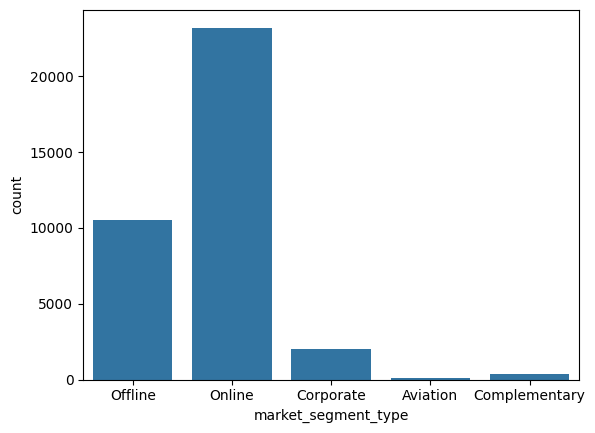

In [ ]:
sns.countplot(data = data, x = "market_segment_type")

- The guests having market segment online is extremely high.

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<Axes: ylabel='avg_price_per_room'>

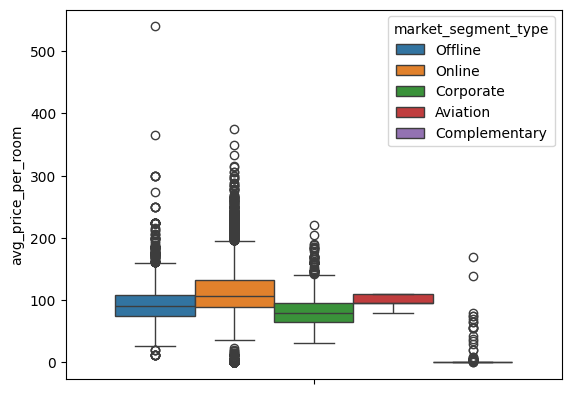

In [ ]:
sns.boxplot(data = data, hue = "market_segment_type", y = "avg_price_per_room")

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

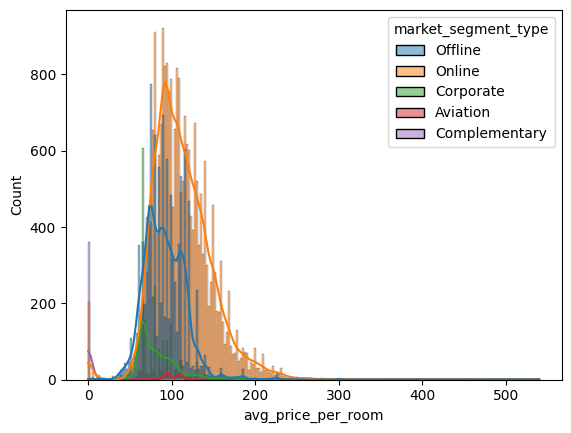

In [ ]:
sns.histplot(data = data, hue = "market_segment_type", x = "avg_price_per_room", kde = True)

                       count        mean        std   min   25%    50%  \
market_segment_type                                                      
Aviation               125.0  100.704000   8.538361  79.0  95.0   95.0   
Complementary          391.0    3.141765  15.512972   0.0   0.0    0.0   
Corporate             2017.0   82.911740  23.690001  31.0  65.0   79.0   
Offline              10528.0   91.632679  24.995597  12.0  75.0   90.0   
Online               23214.0  112.256855  35.220319   0.0  89.0  107.1   

                        75%    max  
market_segment_type                 
Aviation             110.00  110.0  
Complementary          0.00  170.0  
Corporate             95.00  220.0  
Offline              109.00  540.0  
Online               131.75  375.5  


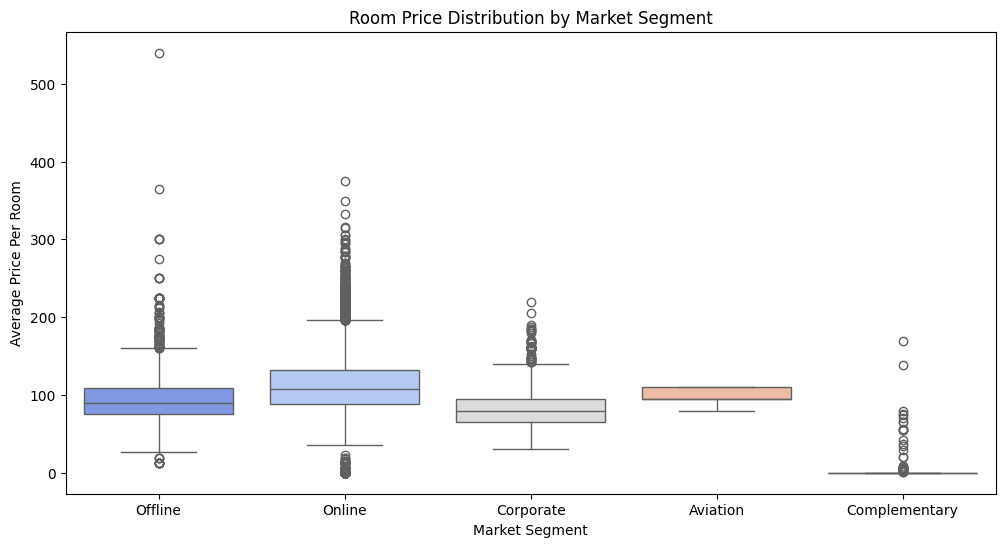

In [ ]:
# Group by market_segment_type and calculate average room prices
price_stats = data.groupby("market_segment_type")["avg_price_per_room"].describe()

# Display summary statistics
print(price_stats)

# Visualize room price distribution across market segments
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room", palette="coolwarm")

# Add labels and title
plt.title("Room Price Distribution by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Price Per Room")

# Show the plot
plt.show()


### 4. What percentage of bookings are canceled?

In [ ]:
data['booking_status'].value_counts()/36275*100

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: count, dtype: float64

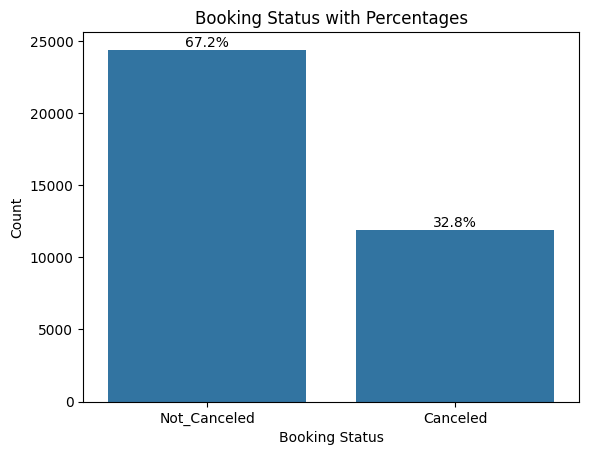

In [ ]:
ax = sns.countplot(data=data, x="booking_status")

# Calculate percentages
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., count),  # Center annotation
                ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title("Booking Status with Percentages")
plt.xlabel("Booking Status")
plt.ylabel("Count")

# Show the plot
plt.show()

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
repeating_guests = data[data["repeated_guest"] == 1]

# Count canceled bookings
canceled_count = (repeating_guests["booking_status"] == "Canceled").sum()

# Total repeating guest bookings
total_repeating = len(repeating_guests)

# Calculate percentage
percentage_canceled = (canceled_count / total_repeating) * 100

# Display result
print(f"Percentage of repeating guests who cancel: {percentage_canceled:.2f}%")

Percentage of repeating guests who cancel: 1.72%


### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

- **Null Hypothesis (H₀):** `no_of_special_requests` and `booking_status` are independent (i.e., special requests do not affect cancellations).

- **Alternative Hypothesis (H₁):** `no_of_special_requests` and `booking_status` are not independent (i.e., there is a relationship).

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data["no_of_special_requests"], data["booking_status"])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

Chi-Square Statistic: 2421.6187208019905
Degrees of Freedom: 5
P-Value: 0.0


In [ ]:
temp = data.copy()

In [ ]:
temp.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

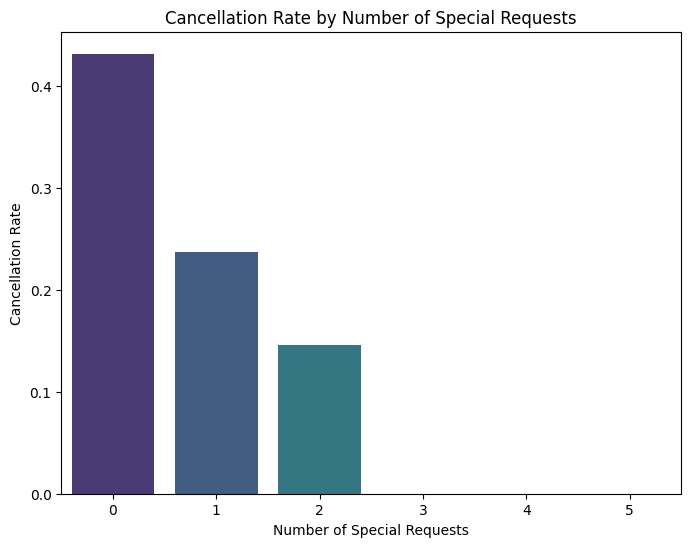

In [ ]:
temp["canceled"] = temp["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
grouped_data = temp.groupby("no_of_special_requests")["canceled"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x="no_of_special_requests", y="canceled", palette="viridis")
plt.title("Cancellation Rate by Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.show()

- Reject the null hypothesis.
- There is strong evidence that the number of special requests is not independent of booking cancellations. In other words, special requests do affect booking cancellations.

# Data Pre-Processing

## Ourliers Detection and Treatment

The outliers are found in the columns `no_of_adults`, `no_of_childern` and `lead_time`.

- There has been noticed that `no_of_adults` = 0. Which are around 139 rows. These rows **can be deleted** as it donesn't compromise with the quality and quantitty of the data.
- There are rows that found with value for `no_of_childern` while `no_of_adults`= 0. Which can be solved.
- There are guests who have booked their rooms >290 days prior. These customers are around 1290.  However we can build a model with and without these outliers and check for the best performing model.


### `booking_status`

In [ ]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [ ]:
temp = data.copy()

In [ ]:
# Create a mapping for unique values
unique_values = temp["booking_status"].unique()
mapping = {value: idx for idx, value in enumerate(unique_values)}

# Replace categorical values with integers
temp["booking_status_encoded"] = temp["booking_status"].map(mapping)

print(mapping)

{'Not_Canceled': 0, 'Canceled': 1}


In [ ]:
temp["booking_status_encoded"].value_counts()

booking_status_encoded
0    24390
1    11885
Name: count, dtype: int64

## Note 1:
**`primary_temp` is the dataframe with no outliers with respect to `no_of_adults` and `no_of_childern`. Which can be further used to build the model and check the performance.**

In [ ]:
primary_temp = temp.copy()

In [ ]:
primary_temp.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  booking_status_encoded  
0                       0   Not_Canceled                       0  
1                       1   Not_Canceled                       0  
2                       0       Canceled                       1  
3                       0       Canceled                       1  
4                       0       Canceled                       1

In [ ]:
primary_temp = primary_temp[primary_temp['no_of_adults'] != 0]

In [ ]:
primary_temp.shape

(36136, 20)

In [ ]:
primary_temp.drop(columns=["Booking_ID"], inplace=True)

In [ ]:
primary_temp.shape

(36136, 19)

In [ ]:
36275 - 36136

139

## Data Preparation

**Let's look at the distribution of target variable**

In [ ]:
data['booking_status'].value_counts(1)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

In [ ]:
primary_temp['booking_status'].value_counts(1)

booking_status
Not_Canceled    0.672321
Canceled        0.327679
Name: proportion, dtype: float64

**67% of the guests have cancelled the booking.**

### Spliting of the data

In [ ]:
primary_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36136 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36136 non-null  int64  
 1   no_of_children                        36136 non-null  int64  
 2   no_of_weekend_nights                  36136 non-null  int64  
 3   no_of_week_nights                     36136 non-null  int64  
 4   type_of_meal_plan                     36136 non-null  object 
 5   required_car_parking_space            36136 non-null  int64  
 6   room_type_reserved                    36136 non-null  object 
 7   lead_time                             36136 non-null  int64  
 8   arrival_year                          36136 non-null  int64  
 9   arrival_month                         36136 non-null  int64  
 10  arrival_date                          36136 non-null  int64  
 11  market_segment_type 

In [ ]:
X = primary_temp.drop(["booking_status", "booking_status_encoded"], axis=1)
Y = primary_temp["booking_status_encoded"]

X = pd.get_dummies(X, columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"], drop_first=True)

X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0
)

y_train.reset_index(inplace = True, drop = True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25295, 27)
Shape of test set :  (10841, 27)
Percentage of classes in training set:
booking_status_encoded
0    0.671911
1    0.328089
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status_encoded
0    0.673277
1    0.326723
Name: proportion, dtype: float64


In [ ]:
X_train.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6800            2.0             0.0                   1.0                2.0   
19279           2.0             0.0                   0.0                2.0   
35894           2.0             0.0                   2.0                3.0   
6604            2.0             0.0                   0.0                3.0   
29802           2.0             0.0                   0.0                3.0   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
6800                          0.0       66.0        2017.0           10.0   
19279                         0.0      111.0        2018.0            8.0   
35894                         0.0       19.0        2017.0           12.0   
6604                          0.0      304.0        2018.0           11.0   
29802                         0.0       14.0        2018.0            2.0   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
6800            9.0             0.0                           0.0   
19279          11.0             0.0                           0.0   
35894           5.0             0.0                           0.0   
6604            3.0             0.0                           0.0   
29802           4.0             0.0                           0.0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6800                                    0.0                75.0   
19279                                   0.0               127.8   
35894                                   0.0                69.0   
6604                                    0.0                89.0   
29802                                   0.0               112.0   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
6800                      0.0                            0.0   
19279                     0.0                            0.0   
35894                     0.0                            0.0   
6604                      0.0                            0.0   
29802                     0.0                            0.0   

       type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
6800                             0.0                             0.0   
19279                            0.0                             0.0   
35894                            0.0                             0.0   
6604                             0.0                             0.0   
29802                            0.0                             0.0   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
6800                              0.0                             0.0   
19279                             0.0                             0.0   
35894                             0.0                             0.0   
6604                              0.0                             0.0   
29802                             0.0                             0.0   

       room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
6800                              0.0                             0.0   
19279                             1.0                             0.0   
35894                             0.0                             0.0   
6604                              0.0                             0.0   
29802                             0.0                             0.0   

       room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
6800                              0.0                             0.0   
19279                             0.0                             0.0   
35894                             0.0                             0.0   
6604                              0.0                             0.0   
29802                             0.0                             1.0   

       market_segment_type_Complementary  market_segment_type_Corporate  \
6800                               

In [ ]:
y_train.head()

0    0
1    0
2    0
3    1
4    0
Name: booking_status_encoded, dtype: int64

In [ ]:
y_test.head()

31875    0
34085    1
19515    1
21531    0
19199    0
Name: booking_status_encoded, dtype: int64

### Scaling the Data

In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# Model Building

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (statsmodels)

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
X_train_with_intercept.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0      0.295289       -0.257359              0.222535   
1    1.0      0.295289       -0.257359             -0.926716   
2    1.0      0.295289       -0.257359              1.371787   
3    1.0      0.295289       -0.257359             -0.926716   
4    1.0      0.295289       -0.257359             -0.926716   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0          -0.149038                    -0.17802  -0.227811     -2.129841   
1          -0.149038                    -0.17802   0.293965      0.469519   
2           0.558793                    -0.17802  -0.772777     -2.129841   
3           0.558793                    -0.17802   2.531804      0.469519   
4           0.558793                    -0.17802  -0.830752      0.469519   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0       0.846772     -0.756967       -0.159298                     -0.061759   
1       0.194089     -0.528012       -0.159298                     -0.061759   
2       1.499454     -1.214876       -0.159298                     -0.061759   
3       1.173113     -1.443831       -0.159298                     -0.061759   
4      -1.763959     -1.329354       -0.159298                     -0.061759   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.086226           -0.817232   
1                             -0.086226            0.689850   
2                             -0.086226           -0.988491   
3                             -0.086226           -0.417627   
4                             -0.086226            0.238867   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0               -0.787846                      -0.316489   
1               -0.787846                      -0.316489   
2               -0.787846                      -0.316489   
3               -0.787846                      -0.316489   
4               -0.787846                      -0.316489   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                      -0.012576                         -0.4008   
1                      -0.012576                         -0.4008   
2                      -0.012576                         -0.4008   
3                      -0.012576                         -0.4008   
4                      -0.012576                         -0.4008   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                        -0.12595                       -0.010891   
1                        -0.12595                       -0.010891   
2                        -0.12595                       -0.010891   
3                        -0.12595                       -0.010891   
4                        -0.12595                       -0.010891   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                       -0.448942                       -0.085835   
1                        2.227461                       -0.085835   
2                       -0.448942                       -0.085835   
3                       -0.448942                       -0.085835   
4                       -0.448942                       -0.085835   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                       -0.166335                       -0.066689   
1                       -0.166335                       -0.066689   
2                       -0.166335                       -0.066689   
3                       -0.166335                       -0.066689   
4                       -0.166335                       14.994940   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                          -0.101711                      -0.242053   
1                          -0.101711                      -0.242053   
2                          -0.101711                      -0.242053

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.423113
         Iterations: 35
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25295
Model:                              Logit   Df Residuals:                    25267
Method:                               MLE   Df Model:                           27
Date:                    Sun, 15 Dec 2024   Pseudo R-squ.:                  0.3314
Time:                            07:34:49   Log-Likelihood:                -10703.
converged:                          False   LL-Null:                       -16007.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.5903    616.427  

### Checking Logistic Regression model performance on training set

In [ ]:
y_pred = LogisticReg.predict(X_train_with_intercept)
y_pred.head()

0    0.068670
1    0.737839
2    0.167027
3    0.970368
4    0.076460
dtype: float64

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

Accuracy    Recall  Precision        F1
0  0.807314  0.635498   0.740418  0.683958

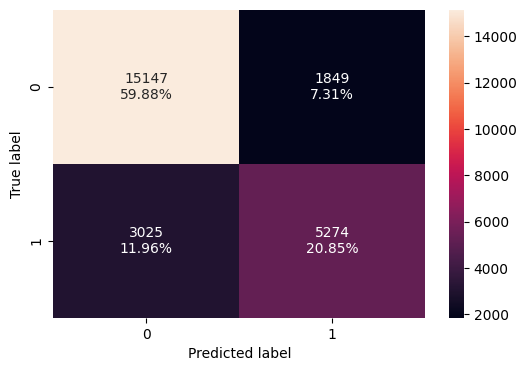

In [ ]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Checking Logistic Regression model performance on test set

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

Accuracy    Recall  Precision        F1
0  0.803247  0.621118    0.73554  0.673504

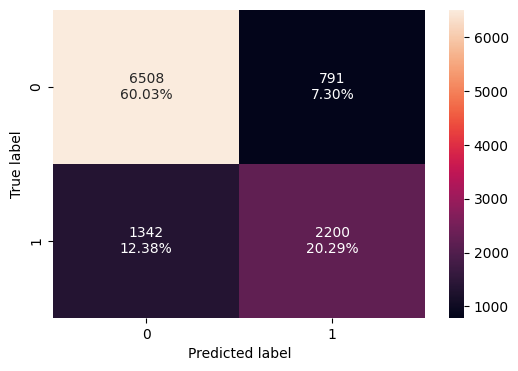

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

**Logistic Regression model is still okay yet there is need to improve a lot**

## KNN Classifier (sklearn)

In [ ]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Checking KNN Classifier performance on training set

In [ ]:
knn_perf_train = model_performance_classification(
    knn_model, X_train_scaled, y_train
)
knn_perf_train

Accuracy    Recall  Precision        F1
0  0.896066  0.814194   0.861423  0.837143

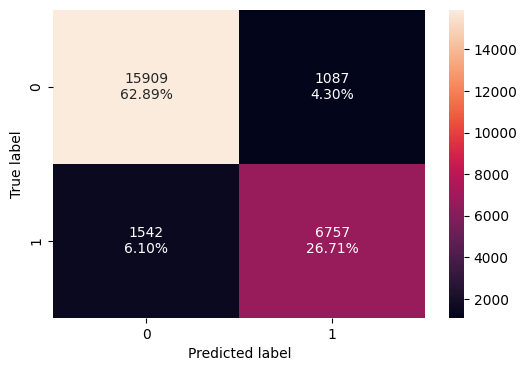

In [ ]:
plot_confusion_matrix(knn_model, X_train_scaled, y_train)

### Checking KNN Classifier performance on test set

In [ ]:
knn_perf_test = model_performance_classification(
    knn_model, X_test_scaled, y_test
)
knn_perf_test

Accuracy    Recall  Precision        F1
0  0.844848  0.727837    0.78216  0.754022

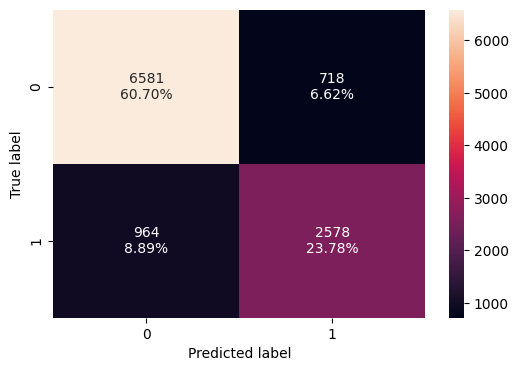

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test)

**KKN Classifier Model performing way better than Logistic Regression model and Naive-Bayes Classifer model.**

## Naive-Bayes Classifier (sklearn)

In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

### Checking Naive - Bayes Classifier performance on training set

In [ ]:
nb_perf_train = model_performance_classification(
    nb_model, X_train_scaled, y_train
)
nb_perf_train

Accuracy    Recall  Precision        F1
0  0.407907  0.963369     0.3527  0.516356

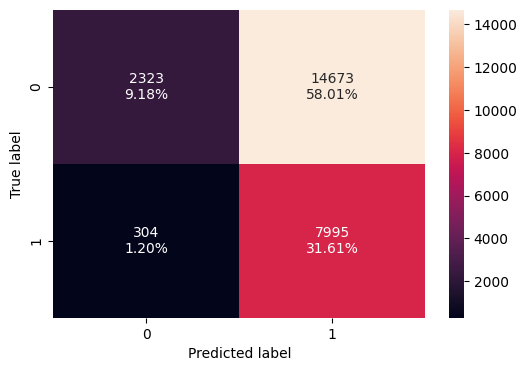

In [ ]:
plot_confusion_matrix(nb_model, X_train_scaled, y_train)

### Checking Naive - Bayes Classifier performance on test set

In [ ]:
nb_perf_test = model_performance_classification(
    nb_model, X_test_scaled, y_test
)
nb_perf_test

Accuracy    Recall  Precision        F1
0  0.410663  0.964427   0.352929  0.516754

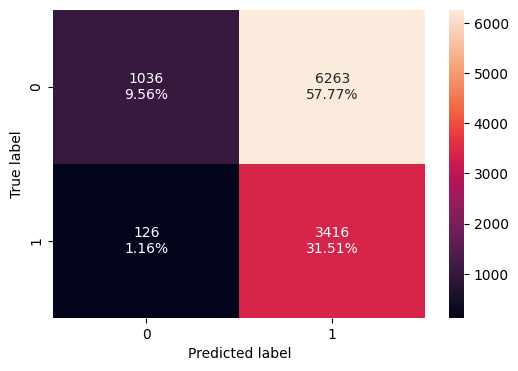

In [ ]:
plot_confusion_matrix(nb_model, X_test_scaled, y_test)

**Naive Bayes Model is performing relatively bad.**

## Decision Tree Classifier (sklearn)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Checking Decision Tree Classifier performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification(
    dt_model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994189  0.985299   0.996952  0.991091

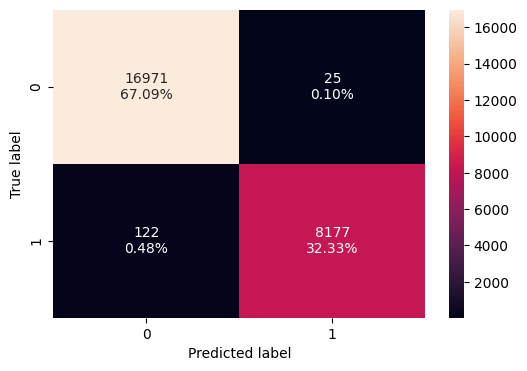

In [ ]:
plot_confusion_matrix(dt_model, X_train, y_train)

### Checking Decision Tree Classifier performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification(
    dt_model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.868093  0.792208   0.801714  0.796933

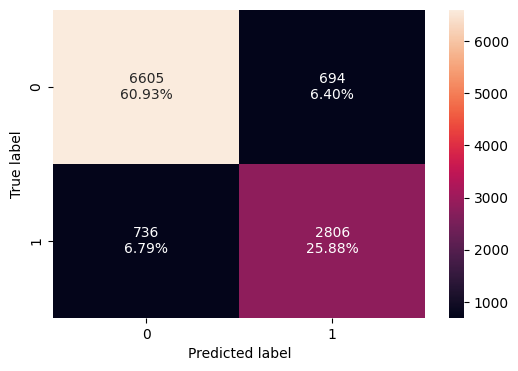

In [ ]:
plot_confusion_matrix(dt_model, X_test, y_test)

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

# Model Performance Improvement

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_with_intercept)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable        VIF
0                                  const   1.000000
1                           no_of_adults   1.338566
2                         no_of_children   2.166028
3                   no_of_weekend_nights   1.069682
4                      no_of_week_nights   1.102081
5             required_car_parking_space   1.034708
6                              lead_time   1.391361
7                           arrival_year   1.434175
8                          arrival_month   1.275176
9                           arrival_date   1.006934
10                        repeated_guest   1.775417
11          no_of_previous_cancellations   1.313017
12  no_of_previous_bookings_not_canceled   1.578117
13                    avg_price_per_room   2.059078
14                no_of_special_requests   1.252008
15         type_of_meal_plan_Meal Plan 2   1.267328
16         type_of_meal_plan_Meal Plan 3   1.017199
17        type_of_meal_plan_Not Sele

In [ ]:
# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping market_segment_type_Online due to high VIF


In [ ]:
print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable       VIF
0                           no_of_adults  1.320619
1                         no_of_children  2.165747
2                   no_of_weekend_nights  1.069281
3                      no_of_week_nights  1.100670
4             required_car_parking_space  1.034687
5                              lead_time  1.386459
6                           arrival_year  1.431521
7                          arrival_month  1.274269
8                           arrival_date  1.006931
9                         repeated_guest  1.772181
10          no_of_previous_cancellations  1.312870
11  no_of_previous_bookings_not_canceled  1.577796
12                    avg_price_per_room  2.058199
13                no_of_special_requests  1.246958
14         type_of_meal_plan_Meal Plan 2  1.266903
15         type_of_meal_plan_Meal Plan 3  1.017198
16        type_of_meal_plan_Not Selected  1.268328
17        room_type_reserved_Room_Type 2  1.030569
18 

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.423117
         Iterations: 35
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25295
Model:                              Logit   Df Residuals:                    25268
Method:                               MLE   Df Model:                           26
Date:                    Sun, 15 Dec 2024   Pseudo R-squ.:                  0.3314
Time:                            07:56:43   Log-Likelihood:                -10703.
converged:                          False   LL-Null:                       -16007.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6213   1330.761  

### Checking Logistic Regression model performance on training set

In [ ]:
y_pred = LogisticReg.predict(X_train_with_intercept)
y_pred.head()

0    0.068645
1    0.738202
2    0.167285
3    0.970364
4    0.076476
dtype: float64

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

Accuracy    Recall  Precision        F1
0  0.807235  0.635378   0.740278  0.683828

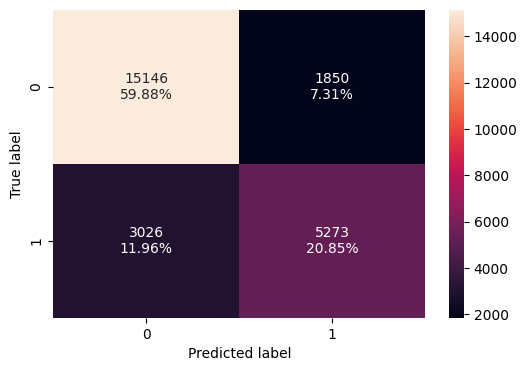

In [ ]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Checking Logistic Regression model performance on test set

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

Accuracy    Recall  Precision        F1
0  0.803155  0.620836   0.735452  0.673301

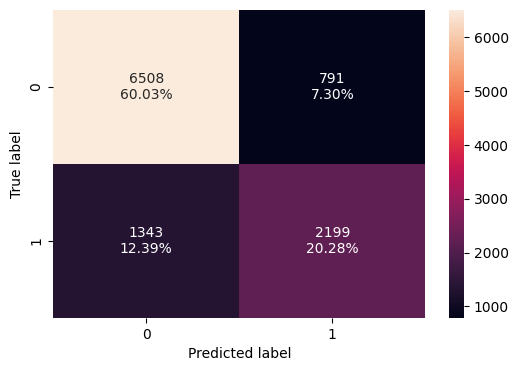

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

### Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.423117
         Iterations: 35
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.9997958325224824
         Current function value: 0.423162
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.9988015346762303
Optimization terminated successfully.
         Current function value: 0.423529
         Iterations 12
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.9333798893050262
Optimization terminated successfully.
         Current function value: 0.423529
         Iterations 12
Dropping column arrival_date with p-value: 0.3760997553863552
Optimization terminated successfully.
         Current function value: 0.423545
         Iterations 12
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.26080427159348396
Optimization terminated successfully.
         Current function value: 0.423606
         Iterations 9
Dropping column no_of_adults with p-value: 0.19573652263466945
Opt

In [ ]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

const  no_of_weekend_nights  no_of_week_nights  required_car_parking_space  \
0    1.0              0.222535          -0.149038                    -0.17802   
1    1.0             -0.926716          -0.149038                    -0.17802   
2    1.0              1.371787           0.558793                    -0.17802   
3    1.0             -0.926716           0.558793                    -0.17802   
4    1.0             -0.926716           0.558793                    -0.17802   
5    1.0             -0.926716          -0.149038                    -0.17802   
6    1.0             -0.926716          -0.856868                    -0.17802   
7    1.0              0.222535           0.558793                    -0.17802   
8    1.0             -0.926716          -0.149038                    -0.17802   
9    1.0              1.371787          -0.856868                    -0.17802   

   lead_time  arrival_year  arrival_month  repeated_guest  \
0  -0.227811     -2.129841       0.846772       -0.159298   
1   0.293965      0.469519       0.194089       -0.159298   
2  -0.772777     -2.129841       1.499454       -0.159298   
3   2.531804      0.469519       1.173113       -0.159298   
4  -0.830752      0.469519      -1.763959       -0.159298   
5   2.601374      0.469519       0.846772       -0.159298   
6  -0.761182      0.469519       1.173113       -0.159298   
7  -0.911917      0.469519      -1.763959       -0.159298   
8   0.201205      0.469519      -1.111276       -0.159298   
9   0.525865     -2.129841       0.194089       -0.159298   

   no_of_previous_cancellations  avg_price_per_room  no_of_special_requests  \
0                     -0.061759           -0.817232               -0.787846   
1                     -0.061759            0.689850               -0.787846   
2                     -0.061759           -0.988491               -0.787846   
3                     -0.061759           -0.417627               -0.787846   
4                     -0.061759            0.238867               -0.787846   
5                     -0.061759           -0.209262                0.483514   
6                     -0.061759            0.353040               -0.787846   
7                     -0.061759           -1.067841                0.483514   
8                     -0.061759            0.324496               -0.787846   
9                     -0.061759           -0.260639               -0.787846   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                         -0.4008                        -0.12595   
1                         -0.4008                        -0.12595   
2                         -0.4008                        -0.12595   
3                         -0.4008                        -0.12595   
4                         -0.4008                        -0.12595   
5                         -0.4008                        -0.12595   
6                         -0.4008                        -0.12595   
7                         -0.4008                        -0.12595   
8                         -0.4008                        -0.12595   
9                         -0.4008                        -0.12595   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                       -0.448942                       -0.085835   
1                        2.227461                       -0.085835   
2                       -0.448942                       -0.085835   
3                       -0.448942                       -0.085835   
4                       -0.448942                       -0.085835   
5                       -0.448942                       -0.085835   
6                       -0.448942                       -0.085835   
7                       -0.448942                       -0.085835   
8                       -0.448942                       -0.085835   
9                       -0.448942                       -0.085835   

   room_type_reserved_Room_Type 6  room_type_rese

### Training the Logistic Regression model again with only the significant features

In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.423725
         Iterations 9
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25295
Model:                              Logit   Df Residuals:                    25276
Method:                               MLE   Df Model:                           18
Date:                    Sun, 15 Dec 2024   Pseudo R-squ.:                  0.3304
Time:                            08:00:31   Log-Likelihood:                -10718.
converged:                           True   LL-Null:                       -16007.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1

### Determining optimal threshold using ROC Curve

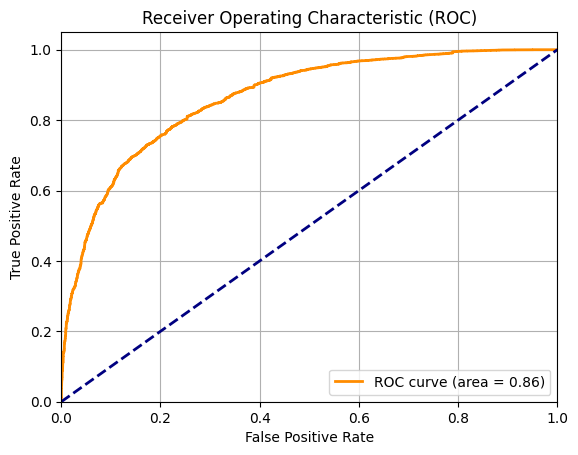

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.317


### Checking tuned Logistic Regression model performance on training set

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.77794  0.781178   0.630397  0.697734

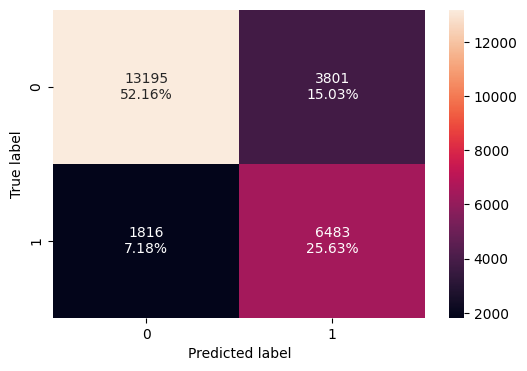

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

### Checking tuned Logistic Regression model performance on test set

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.776866  0.774986   0.628578  0.694146

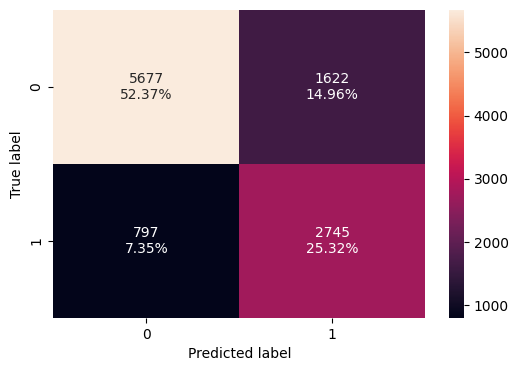

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

**The performance of the Logistic Regression model has improved considerably (on both training and test sets) by dropping variables with high VIF, p-values and setting an optimal threshold.**

## KNN Classifier (different values of K)

### KNN Classifier Performance Improvement using different k values

In [ ]:
# Define the range for k values
k_values = range(2, 21)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.6214003387916431
Recall for k=3: 0.733201581027668
Recall for k=4: 0.6524562394127611
Recall for k=5: 0.7272727272727273
Recall for k=6: 0.6671372106154715
Recall for k=7: 0.7219085262563524
Recall for k=8: 0.6708074534161491
Recall for k=9: 0.7094861660079052
Recall for k=10: 0.6705251270468662
Recall for k=11: 0.7055335968379447
Recall for k=12: 0.6750423489553924
Recall for k=13: 0.7086391869000565
Recall for k=14: 0.6679841897233202
Recall for k=15: 0.7007340485601355
Recall for k=16: 0.6722190852625636
Recall for k=17: 0.6990400903444381
Recall for k=18: 0.6727837380011293
Recall for k=19: 0.6914172783738001
Recall for k=20: 0.6699604743083004

The best value of k is: 3 with a recall of: 0.733201581027668


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Checking tuned KNN model performance on training set

In [ ]:
knn_tuned_perf_train = model_performance_classification(
    knn_tuned, X_train_scaled, y_train
)
knn_tuned_perf_train

Accuracy   Recall  Precision        F1
0  0.915754  0.85444   0.884827  0.869368

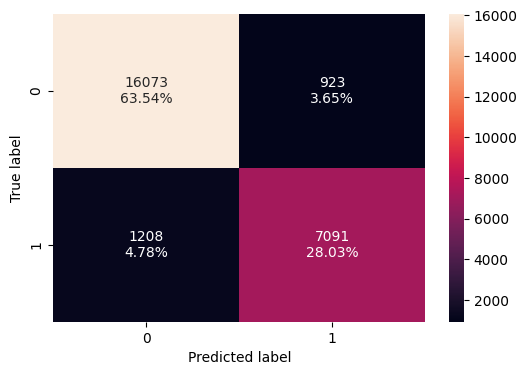

In [ ]:
plot_confusion_matrix(knn_tuned, X_train_scaled, y_train)

### Checking tuned KNN model performance on test set

In [ ]:
knn_tuned_perf_test = model_performance_classification(
    knn_tuned, X_test_scaled, y_test
)
knn_tuned_perf_test

Accuracy    Recall  Precision        F1
0  0.838945  0.733202   0.764273  0.748415

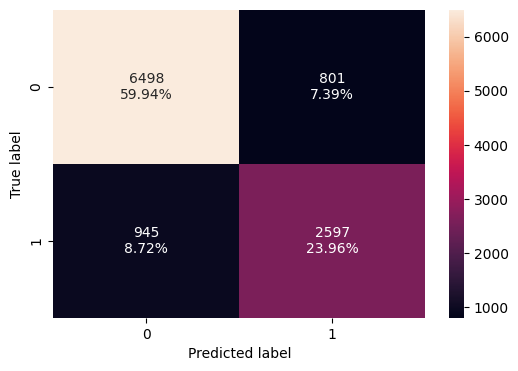

In [ ]:
plot_confusion_matrix(knn_tuned, X_test_scaled, y_test)

**The value of k new model is 3 which is different (k=5) from the base model. So the model performance improved by 1%.**

## Decision Tree Classifier (pre-pruning and post-pruning)

### Pre - pruning the tree

In [ ]:
# Choose the type of classifier.
dt_model_tuned_1 = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       max_leaf_nodes=100, random_state=42)

### Checking pre-pruned Decision Tree Classifier performance on training set

In [ ]:
dt_model_tuned_1_perf_train = model_performance_classification(
    dt_model_tuned_1, X_train, y_train
)
dt_model_tuned_1_perf_train

Accuracy    Recall  Precision        F1
0  0.866258  0.834317    0.77519  0.803668

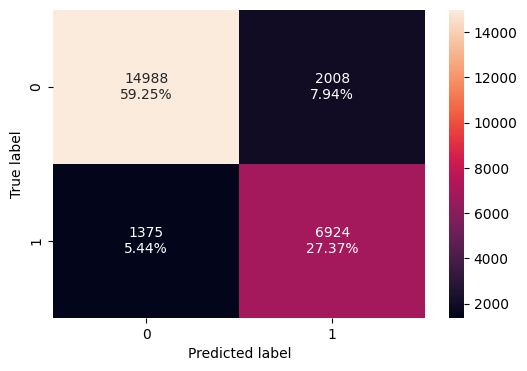

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_train, y_train)

### Checking pre-pruned Decision Tree Classifier performance on test set

In [ ]:
dt_model_tuned_1_perf_test = model_performance_classification(
    dt_model_tuned_1, X_test, y_test
)
dt_model_tuned_1_perf_test

Accuracy    Recall  Precision        F1
0  0.858039  0.815923   0.765158  0.789725

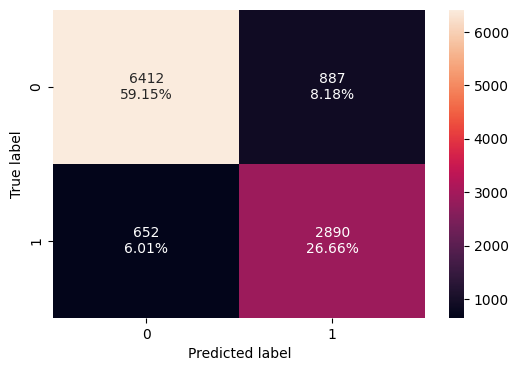

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_test, y_test)

### Visualizing the Decision Tree

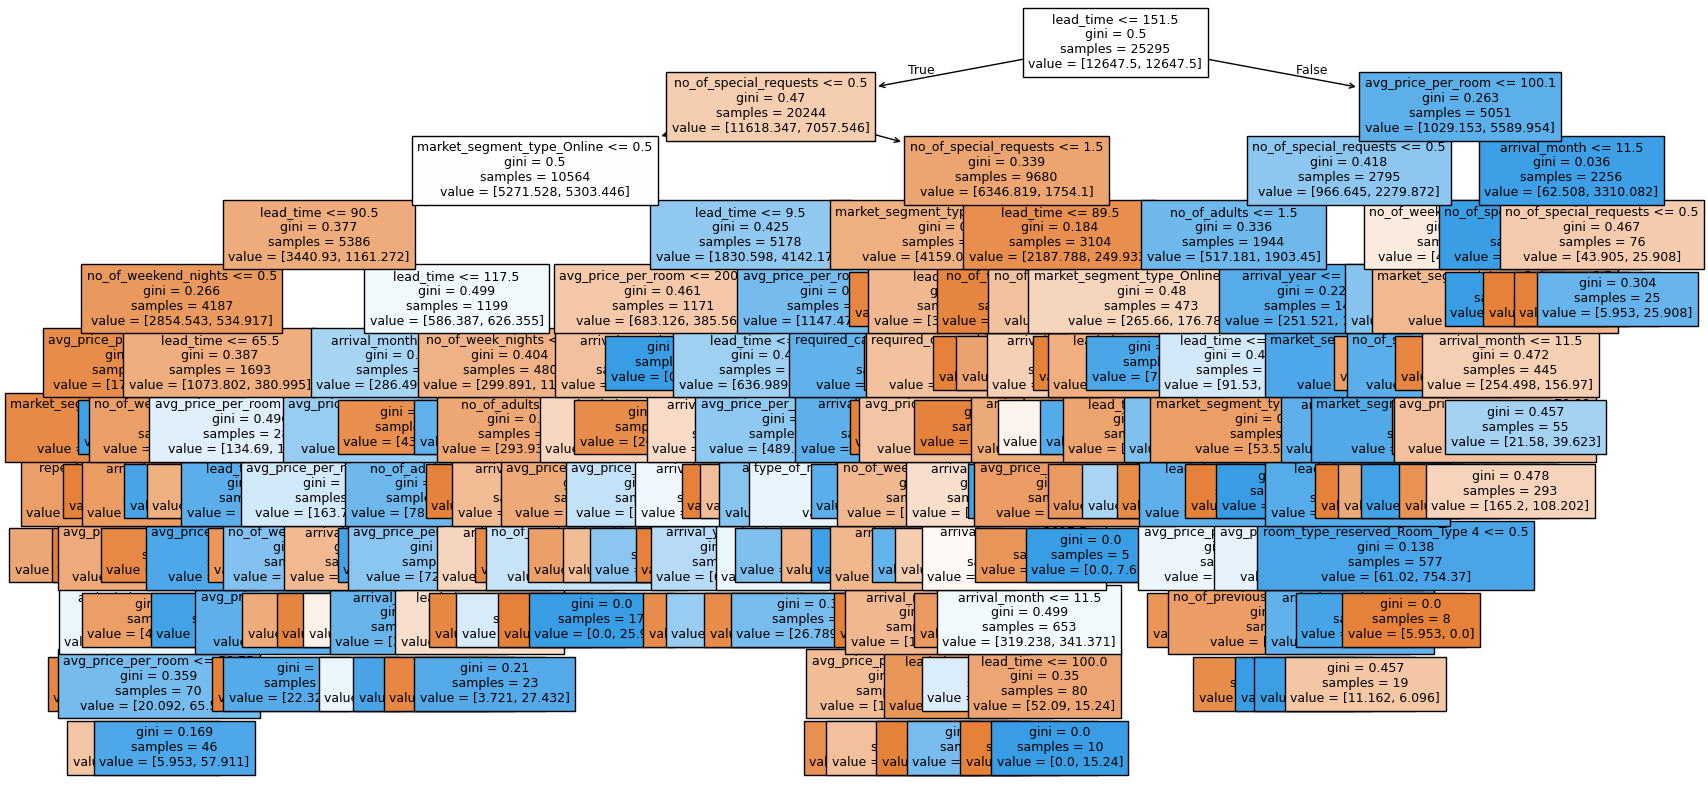

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned_1,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Analyzing Feature Importance for tuned Decision Tree Classifier

In [ ]:
print(
    pd.DataFrame(
        dt_model_tuned_1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.441589
market_segment_type_Online            0.166986
no_of_special_requests                0.141954
avg_price_per_room                    0.098214
arrival_month                         0.043714
no_of_weekend_nights                  0.025024
no_of_adults                          0.024758
arrival_year                          0.015983
required_car_parking_space            0.011630
arrival_date                          0.010146
no_of_week_nights                     0.009313
market_segment_type_Offline           0.004262
type_of_meal_plan_Meal Plan 2         0.002452
repeated_guest                        0.001386
room_type_reserved_Room_Type 4        0.001370
no_of_previous_cancellations          0.001218
no_of_previous_bookings_not_canceled  0.000000
no_of_children                        0.000000
type_of_meal_plan_Not Selected        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_res

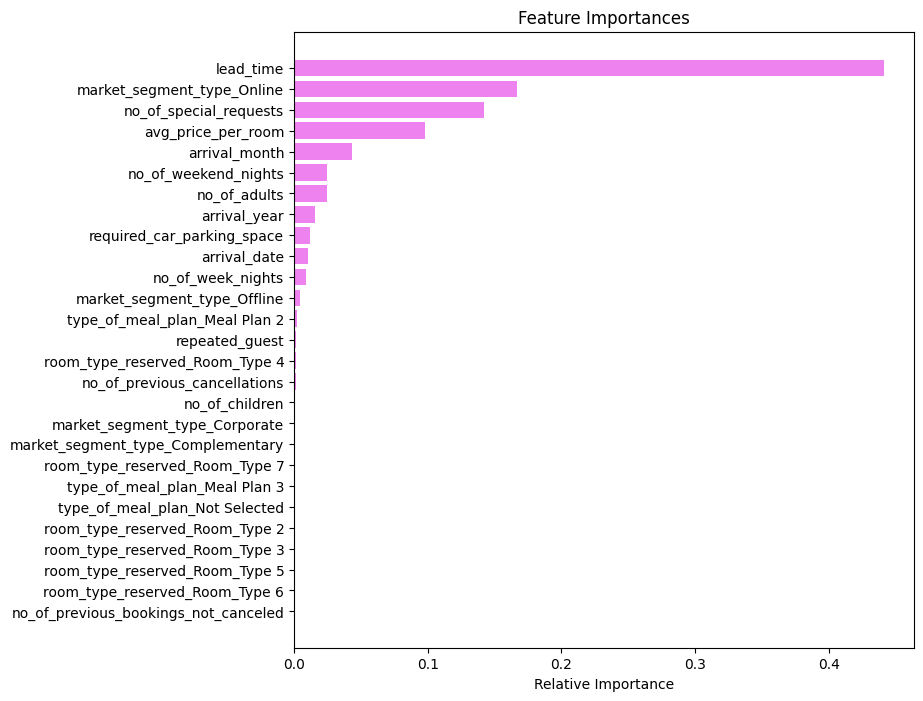

In [ ]:
# importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Post - pruning the tree

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007460
1     8.109437e-07    0.007460
2     8.785223e-07    0.007461
3     9.172073e-07    0.007463
4     1.026844e-06    0.007464
...            ...         ...
1315  6.870508e-03    0.283765
1316  1.161178e-02    0.295376
1317  1.804101e-02    0.313417
1318  2.419435e-02    0.361806
1319  7.908693e-02    0.440893

[1320 rows x 2 columns]

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, y_train)
    dt_models.append(dt_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dt_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0790869313221389


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

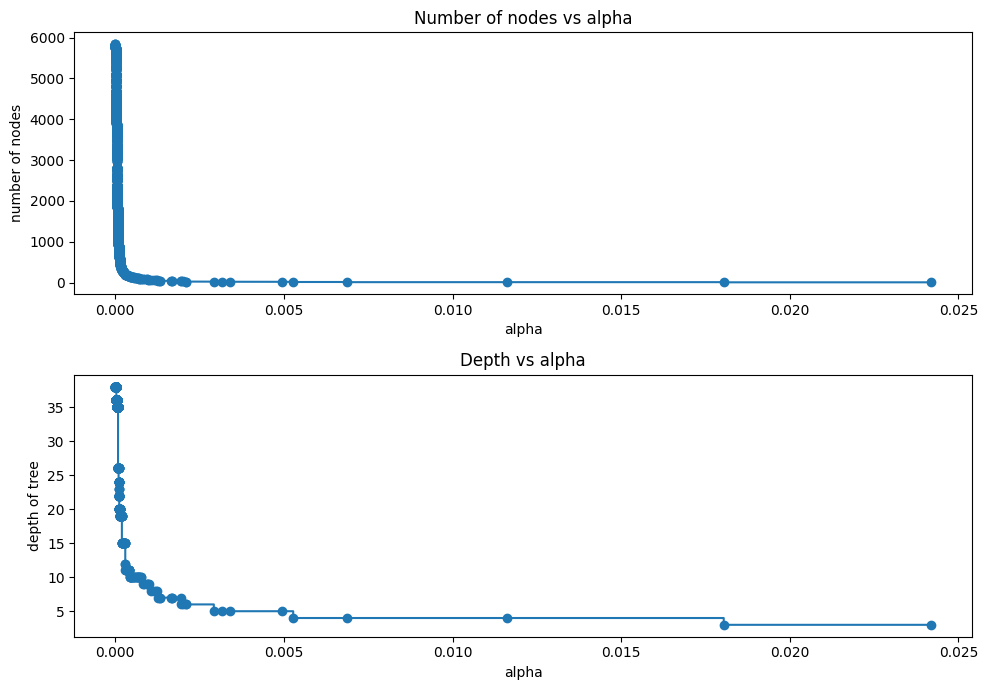

In [ ]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and test sets

In [ ]:
recall_train = []
for dt_mpdel in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

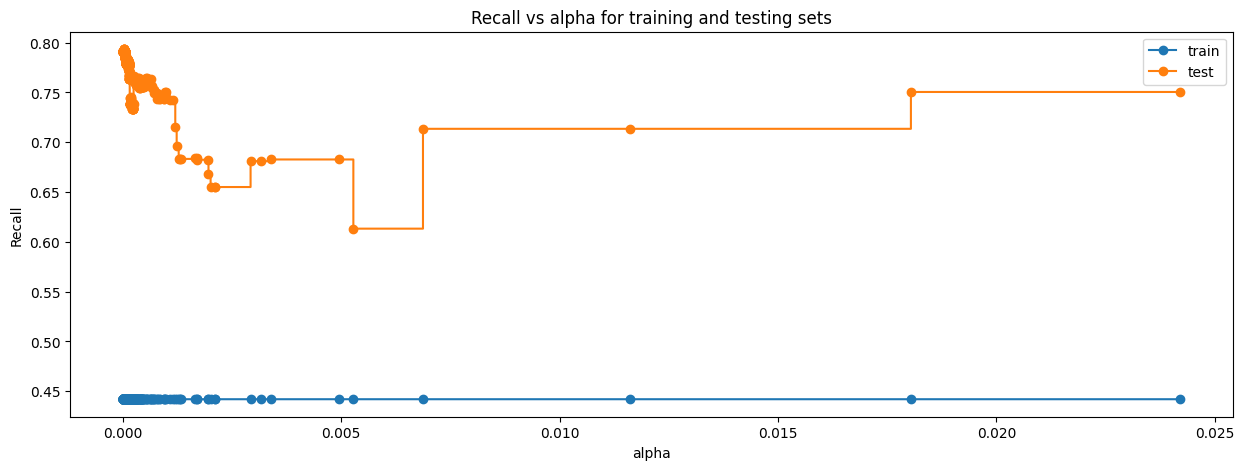

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(ccp_alpha=2.6030291124402847e-05, random_state=1)


In [ ]:
dt_model_tuned_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.126, 1: 0.874}, random_state=1
)
dt_model_tuned_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0790869313221389,
                       class_weight={0: 0.126, 1: 0.874}, random_state=1)

### Checking post-pruned Decision Tree Classifier performance on training set

In [ ]:
dt_model_tuned_2_perf_train = model_performance_classification(dt_model_tuned_2, X_train, y_train)
dt_model_tuned_2_perf_train

Accuracy  Recall  Precision        F1
0  0.328089     1.0   0.328089  0.494076

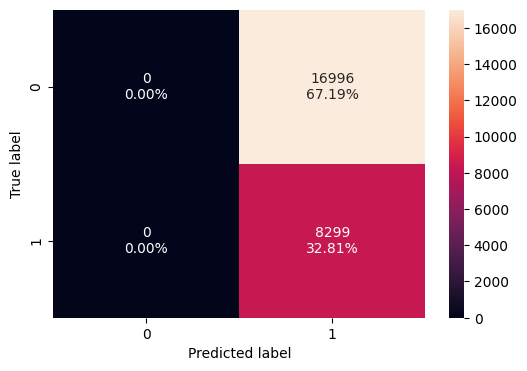

In [ ]:
plot_confusion_matrix(dt_model_tuned_2, X_train, y_train)

### Checking post-pruned Decision Tree Classifier performance on test set

In [ ]:
dt_model_tuned_2_perf_test = model_performance_classification(dt_model_tuned_2, X_test, y_test)
dt_model_tuned_2_perf_test

Accuracy  Recall  Precision        F1
0  0.326723     1.0   0.326723  0.492526

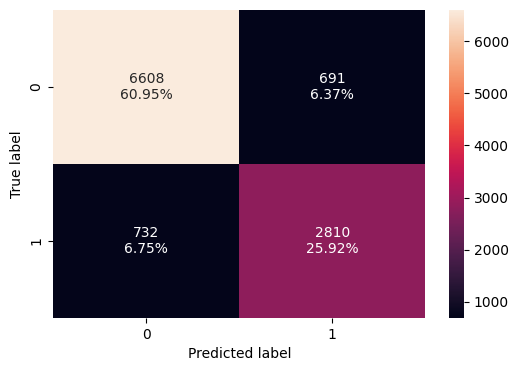

In [ ]:
plot_confusion_matrix(dt_model_post_pruned, X_test, y_test)  # Complete the code to get the confusion matrix on test data

### Visualizing the Decision Tree

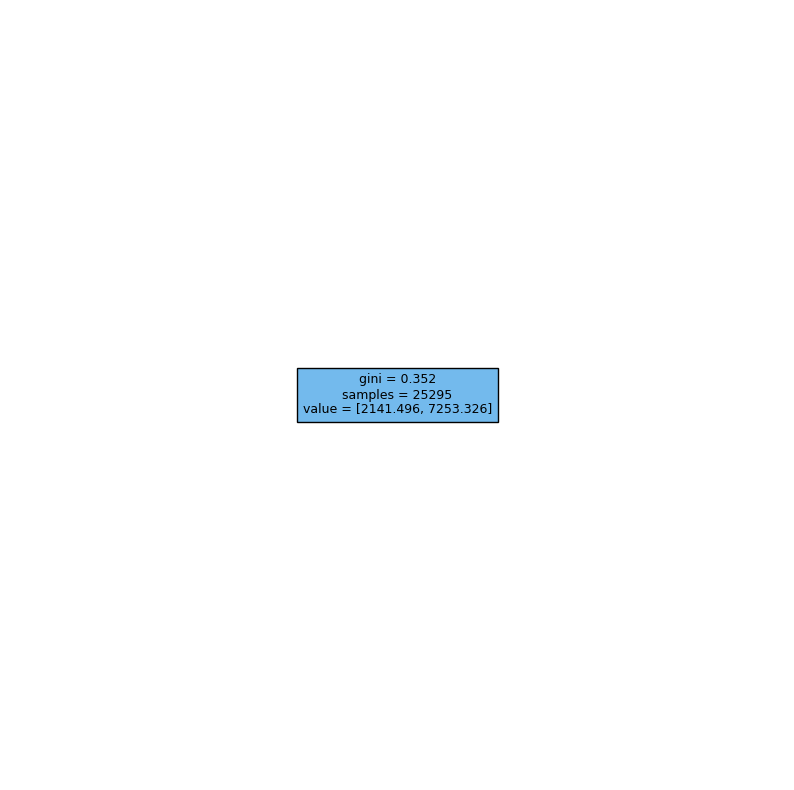

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_model_tuned_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_model_tuned_2, feature_names=feature_names, show_weights=True))

|--- weights: [2141.50, 7253.33] class: 1



### Analyzing Feature Importance for tuned Decision Tree Classifier

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dt_model_tuned_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
no_of_adults                          0.0
type_of_meal_plan_Meal Plan 2         0.0
market_segment_type_Offline           0.0
market_segment_type_Corporate         0.0
market_segment_type_Complementary     0.0
room_type_reserved_Room_Type 7        0.0
room_type_reserved_Room_Type 6        0.0
room_type_reserved_Room_Type 5        0.0
room_type_reserved_Room_Type 4        0.0
room_type_reserved_Room_Type 3        0.0
room_type_reserved_Room_Type 2        0.0
type_of_meal_plan_Not Selected        0.0
type_of_meal_plan_Meal Plan 3         0.0
no_of_special_requests                0.0
no_of_children                        0.0
avg_price_per_room                    0.0
no_of_previous_bookings_not_canceled  0.0
no_of_previous_cancellations          0.0
repeated_guest                        0.0
arrival_date                          0.0
arrival_month                         0.0
arrival_year                          0.0
lead_time                         

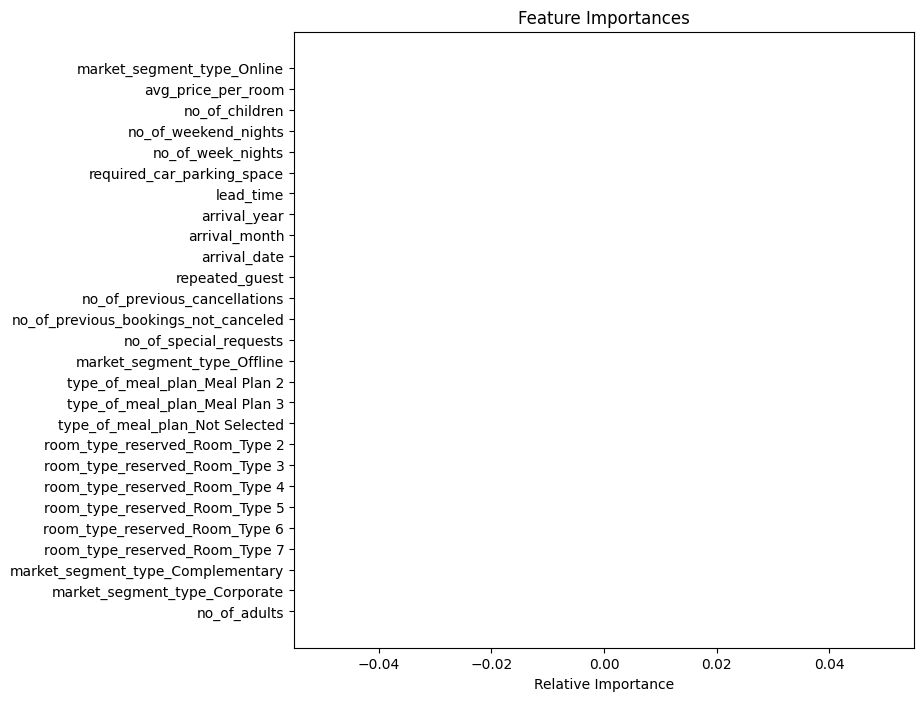

In [ ]:
importances = dt_model_tuned_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        dt_model_tuned_1_perf_train.T,
        dt_model_tuned_2_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Improved",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Base  Logistic Regression Improved  \
Accuracy                   0.807235                      0.777940   
Recall                     0.635378                      0.781178   
Precision                  0.740278                      0.630397   
F1                         0.683828                      0.697734   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy           0.407907  0.896066   0.915754            0.994189   
Recall             0.963369  0.814194   0.854440            0.985299   
Precision          0.352700  0.861423   0.884827            0.996952   
F1                 0.516356  0.837143   0.869368            0.991091   

           Decision Tree Pre-Pruned  Decision Tree Post-Pruned  
Accuracy                   0.866258                   0.328089  
Recall                     0.834317                   1.000000  
Precision                  0.775190                   0.328089  
F1                         0.803668                   0.494076

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        dt_model_tuned_1_perf_test.T,
        dt_model_tuned_2_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression Base  Logistic Regression Tuned  \
Accuracy                   0.803155                   0.776866   
Recall                     0.620836                   0.774986   
Precision                  0.735452                   0.628578   
F1                         0.673301                   0.694146   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy           0.410663  0.844848   0.838945            0.868093   
Recall             0.964427  0.727837   0.733202            0.792208   
Precision          0.352929  0.782160   0.764273            0.801714   
F1                 0.516754  0.754022   0.748415            0.796933   

           Decision Tree Pre-Pruned  Decision Tree Post-Pruned  
Accuracy                   0.858039                   0.326723  
Recall                     0.815923                   1.000000  
Precision                  0.765158                   0.326723  
F1                         0.789725                   0.492526

**Observations**
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with the recall score of 0.83 and 0.79 on training and test set, respectively.
* **The company can predict the guests cancellations better using the pre-pruned tree.**